In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import itertools

#DATA **IMPORTING**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/GREAT LEARNING PYTHON LANGUAGE CLASS/CAPSTONE PROJECT/application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# **DATA UNDERSTANDING**

### Shape

In [4]:
print ("dataset shape:",df.shape)

dataset shape: (307511, 122)


### info

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Numerical Variables

In [6]:
df_num = df.select_dtypes(np.number)
df_num.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 106 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    CNT_CHILDREN                  int64  
 3    AMT_INCOME_TOTAL              float64
 4    AMT_CREDIT                    float64
 5    AMT_ANNUITY                   float64
 6    AMT_GOODS_PRICE               float64
 7    REGION_POPULATION_RELATIVE    float64
 8    DAYS_BIRTH                    int64  
 9    DAYS_EMPLOYED                 int64  
 10   DAYS_REGISTRATION             float64
 11   DAYS_ID_PUBLISH               int64  
 12   OWN_CAR_AGE                   float64
 13   FLAG_MOBIL                    int64  
 14   FLAG_EMP_PHONE                int64  
 15   FLAG_WORK_PHONE               int64  
 16   FLAG_CONT_MOBILE              int64  
 17   FLAG_PHONE                    int64  
 18   FL

### Categorical variables

In [7]:
df_cat = df.select_dtypes('object')
df_cat.dtypes

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object

###Missing values in Variables

In [8]:
Total = df.isnull().sum().sort_values(ascending=False)  
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data.head(2)

,Total,Percentage of Missing Values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297


List of Columns with Missing Values

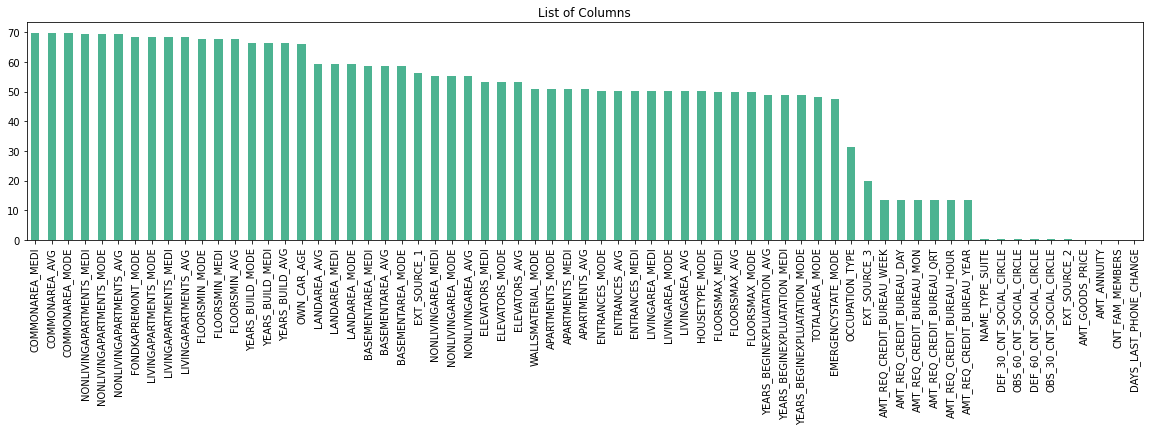

(307511, 122)


In [9]:
NA_col = df.isnull().sum()/len(df)*100
NA_col.sort_values(ascending = False)
c = NA_col[NA_col.values >0].sort_values(ascending = False)
plt.figure(figsize=(20,4))
c.plot(kind='bar', color="#4CB391")
plt.title('List of Columns')
plt.show()
print(df.shape)

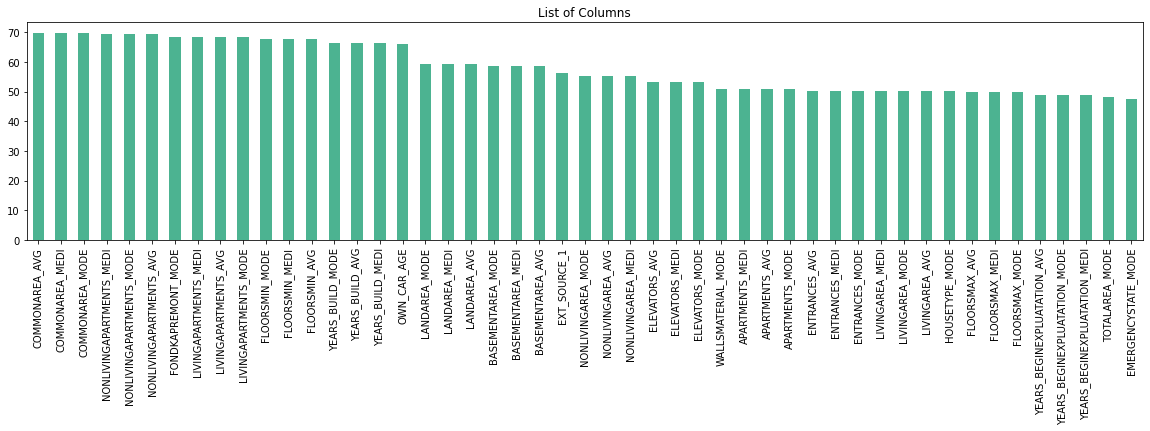

(307511, 122)


In [10]:
NA_col = df.isnull().sum()/len(df)*100
NA_col.sort_values(ascending = False)
c = NA_col[NA_col.values >=40].sort_values(ascending = False)
plt.figure(figsize=(20,4))
c.plot(kind='bar', color="#4CB391")
plt.title('List of Columns')
plt.show()
print(df.shape)

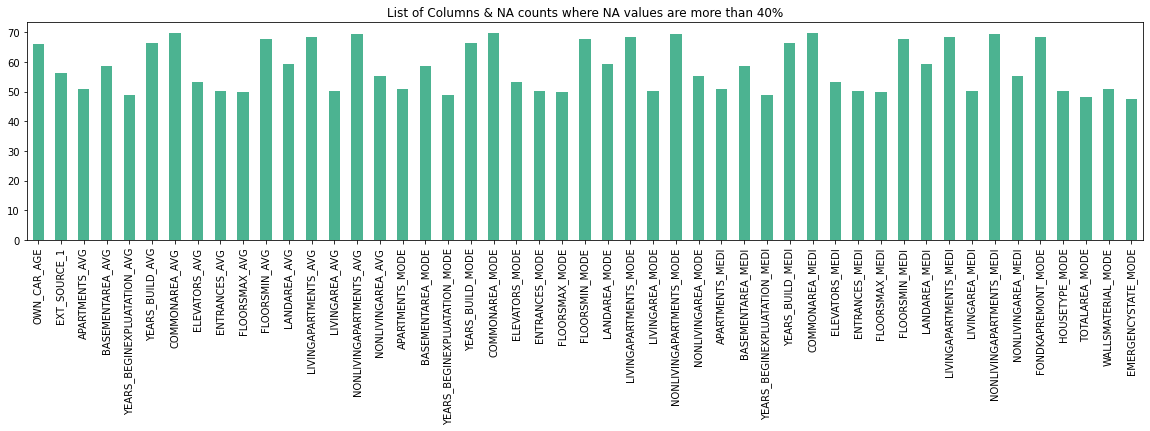

In [11]:
# List of Columns & NA counts where NA values are more than 40%

NA_col_40 = df.isnull().sum()/len(df)*100
NA_col_40.sort_values(ascending = False)
NA_col_40 = NA_col[NA_col.values >40]
plt.figure(figsize=(20,4))

NA_col_40.plot(kind='bar', color="#4CB391")
plt.title('List of Columns & NA counts where NA values are more than 40%')
plt.show()

Dataframe After removing the columns with 40 percent missing values

In [12]:
df1 = df.drop(NA_col_40[NA_col_40>40].index, axis=1)
print(df1.shape)
df1.head(2)

(307511, 73)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Distribution Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6a02b5b90>,
      dtype=object)

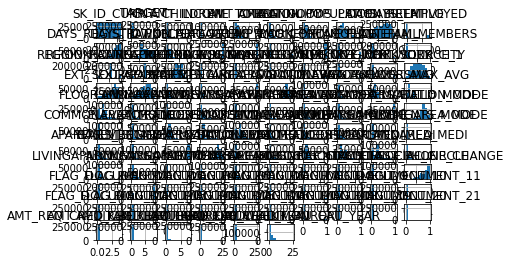

In [14]:
df_num.hist()
# some run this cell and get the output

### Correlation Analysis

In [15]:
# 

###Outlier Analysis

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35]), <a list of 35 Text major ticklabel objects>)

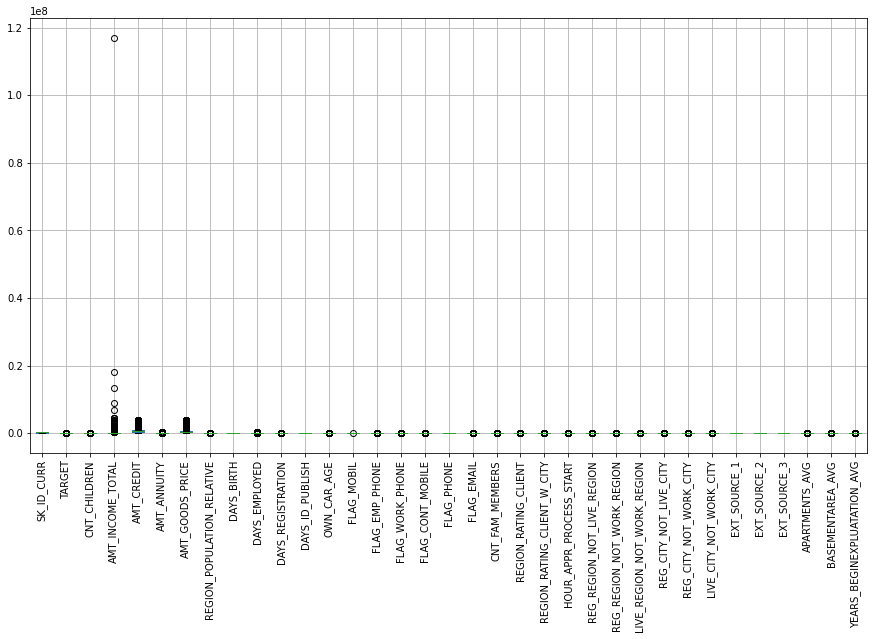

In [16]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
df_num.iloc[:, : 35].boxplot()
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54]), <a list of 54 Text major ticklabel objects>)

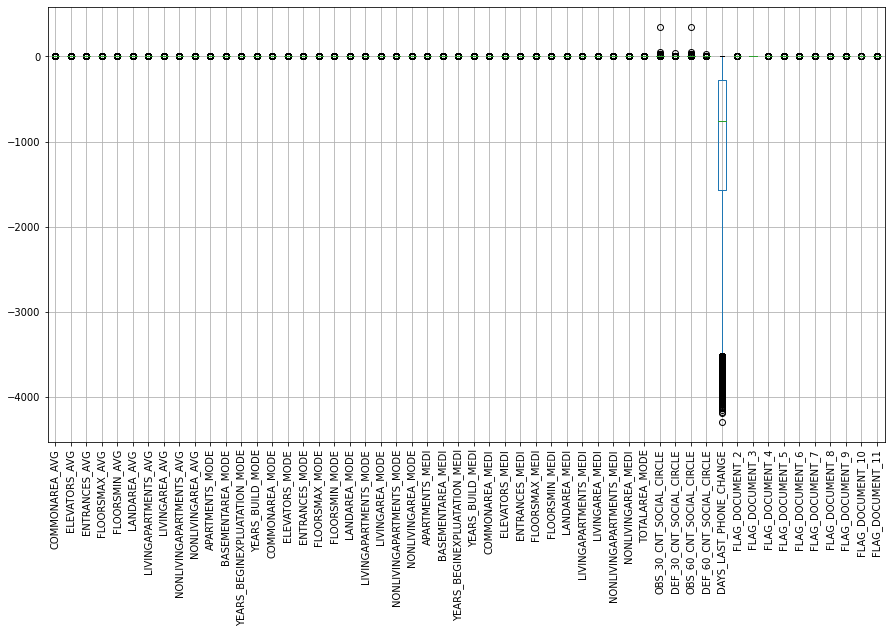

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
df_num.iloc[:, 36: 90].boxplot()
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

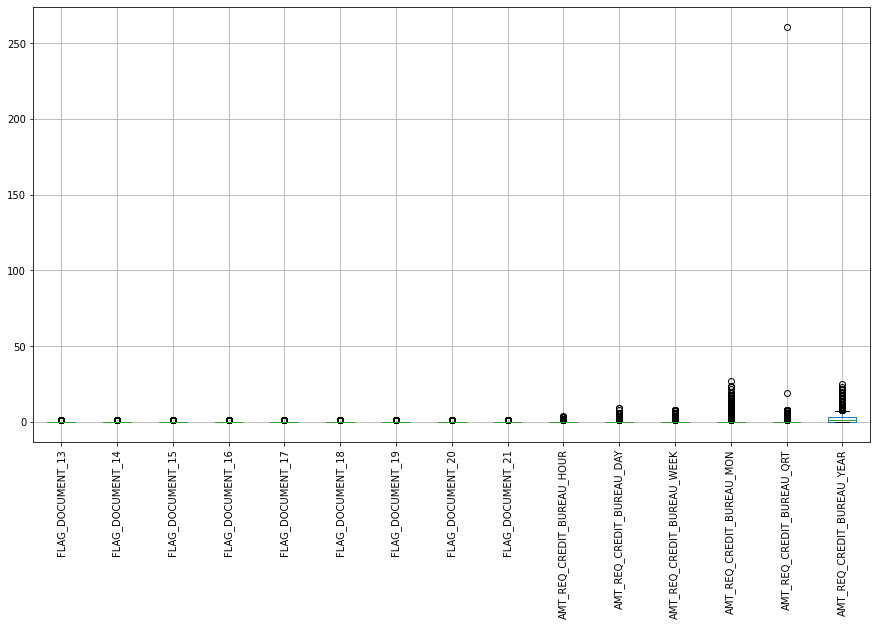

In [18]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
df_num.iloc[:, 91:].boxplot()
plt.xticks(rotation = 90)

# Pre-Processing

### Missing value Treatment

In [19]:
# Removing the variable more than 40 percent missing values
#Function to remove the columns having percentage of null values > 40%
def removenull(df,percent=0.40):
    df = df.copy()
    ishape = df.shape
    colnames = (df.isnull().sum()/len(df))
    colnames = list(colnames[colnames.values>=percent].index)
    df.drop(labels = colnames,axis =1,inplace=True)        
    print("Number of Columns dropped\t: ",len(colnames))    
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)
    return df

df = removenull(df,percent = 0.40)


Number of Columns dropped	:  49

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 73)


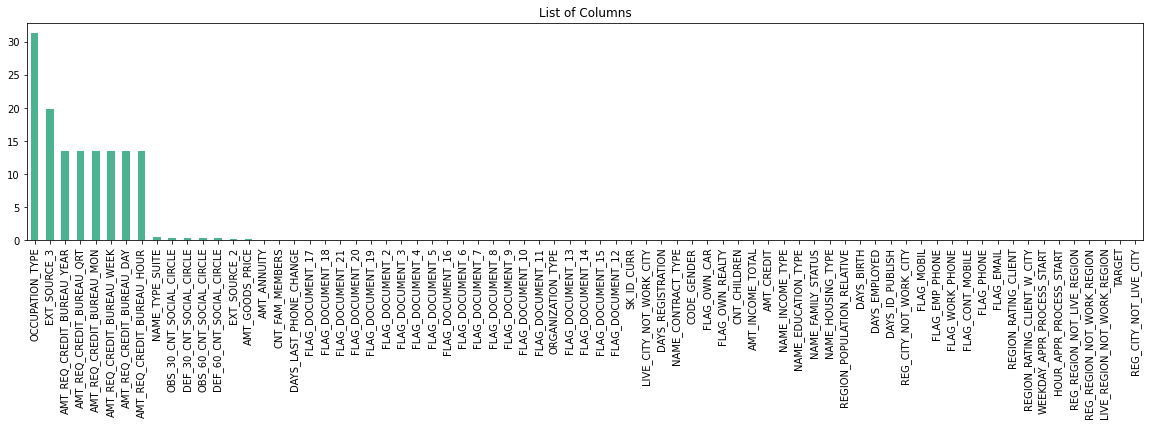

(307511, 73)


In [20]:
NA_col = df.isnull().sum()/len(df)*100
NA_col.sort_values(ascending = False)
c = NA_col[NA_col.values >=(0*len(df))].sort_values(ascending = False)
plt.figure(figsize=(20,4))
c.plot(kind='bar', color="#4CB391")
plt.title('List of Columns')
plt.show()
print(df.shape)

In [21]:
Total = df.isnull().sum().sort_values(ascending=False)  
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data.head(2)

,Total,Percentage of Missing Values
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307


Columns which has Missing values which is greater than 15 percent

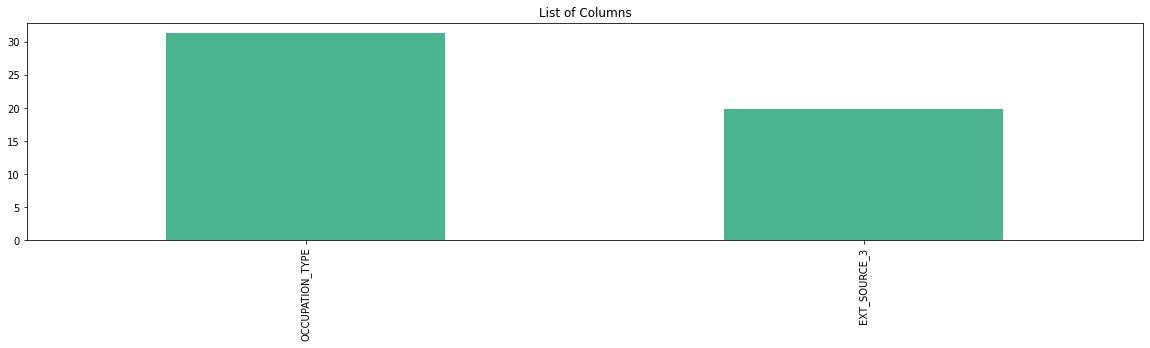

(307511, 73)


In [22]:
NA_col = df.isnull().sum()/len(df)*100
NA_col.sort_values(ascending = False)
c = NA_col[NA_col.values >=15].sort_values(ascending = False)
plt.figure(figsize=(20,4))
c.plot(kind='bar', color="#4CB391")
plt.title('List of Columns')
plt.show()
print(df.shape)

In [23]:
df1 = df.copy()

In [24]:
# Based on the graph above, columns occupation_type and ext_source_3 have more then 15% of the null values
#Check the type of these variables

In [25]:
df1[['OCCUPATION_TYPE', 'EXT_SOURCE_3']].head(10)

,OCCUPATION_TYPE,EXT_SOURCE_3
0,Laborers,0.139376
1,Core staff,NaN
2,Laborers,0.729567
3,Laborers,NaN
4,Core staff,NaN
5,Laborers,0.621226
6,Accountants,0.492060
7,Managers,0.540654
8,NaN,0.751724
9,Laborers,NaN


Occupation type is categorical imputing with mode

In [26]:
# missing values in occupation type - categorical
df1['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

31% of the data in the column have the null values, impute the null value with 'Mode'

Also occupation type is expected to have some impact on the target variable.

In [27]:
df1['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)
df1['OCCUPATION_TYPE'].isnull().sum()/len(df)

0.0

EXT_SOURCE_3

Numerical variable replacing with median


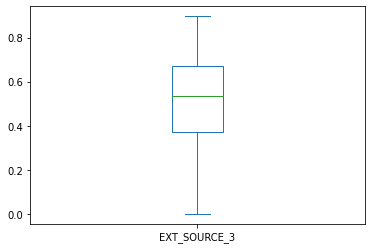

In [28]:
df1['EXT_SOURCE_3'].plot.box()
plt.show()

In [29]:
df1['EXT_SOURCE_3'].fillna(df1['EXT_SOURCE_3'].median(), inplace=True)

columns less than 15 percent missing values

In [30]:
missing_data[missing_data['Percentage of Missing Values']<15]

,Total,Percentage of Missing Values
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
TARGET,0,0.000000


Taking the bottom columns from the list above with prefix AMT

These columns are continious type

These columns gives info on number of enquiries to Credit Bureau about the client

In [31]:
columns = df1[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']]
columns.describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


These columns have outliers in it, imputing the missing values with median

In [32]:
for col in columns:
    df1[col].fillna(df1[col].median(), inplace=True)
df1[col].isnull().sum()

0

Columns with null values less than 13%

In [33]:
Total = df1.isnull().sum().sort_values(ascending=False)  
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data.head(10)

,Total,Percentage of Missing Values
NAME_TYPE_SUITE,1292,0.420148
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650
DAYS_LAST_PHONE_CHANGE,1,0.000325


In [34]:
for col in missing_data[missing_data['Percentage of Missing Values']<13].index:
    df1 = df1[~(df1[col].isnull())]
df1.shape

(304531, 73)

In [35]:
Total = df1.isnull().sum().sort_values(ascending=False)  
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data.head(10)

,Total,Percentage of Missing Values
SK_ID_CURR,0,0.0
REG_CITY_NOT_WORK_CITY,0,0.0
FLAG_DOCUMENT_8,0,0.0
FLAG_DOCUMENT_7,0,0.0
FLAG_DOCUMENT_6,0,0.0
FLAG_DOCUMENT_5,0,0.0
FLAG_DOCUMENT_4,0,0.0
FLAG_DOCUMENT_3,0,0.0
FLAG_DOCUMENT_2,0,0.0
DAYS_LAST_PHONE_CHANGE,0,0.0


Processed all the variable which has missing values

### Redudant Variables

Looking at some of columns (based on the description of columns in columns_description.csv), i.e flag_document_2 to flag_document _21 are not providing any meaningfull information

These columns does not sepcify what the document is about or have any meaning in it
Dropping these columns to avoid confusion

### Categorical variable Treatment

In [36]:
# code gender

In [37]:
df1['CODE_GENDER'].value_counts()

F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64

In [38]:
df1['CODE_GENDER'].replace({'XNA':'F'},inplace = True)

In [39]:
df1['CODE_GENDER'].value_counts()

F    200486
M    104045
Name: CODE_GENDER, dtype: int64

In [40]:
# organsation type

In [41]:
df1['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67270
XNA                       54852
Self-employed             38048
Other                     16546
Medicine                  11078
Business Entity Type 2    10458
Government                10308
School                     8823
Trade: type 7              7769
Kindergarten               6823
Construction               6659
Business Entity Type 1     5919
Transport: type 4          5353
Trade: type 3              3443
Industry: type 9           3328
Industry: type 3           3254
Security                   3215
Housing                    2935
Industry: type 11          2685
Military                   2610
Bank                       2455
Agriculture                2436
Police                     2319
Transport: type 2          2184
Postal                     2137
Security Ministries        1953
Trade: type 2              1871
Restaurant                 1794
Services                   1561
University                 1311
Industry: type 7           1295
Transpor

In [42]:
df1['ORGANIZATION_TYPE'].replace('XNA','Missing', inplace=True)
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Date variable

Columns with prefix DAYS have values in -ve, changing them in to +ve

In [43]:
colsWithNeg = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [44]:
df1[colsWithNeg].dtypes

DAYS_BIRTH                  int64
DAYS_EMPLOYED               int64
DAYS_REGISTRATION         float64
DAYS_ID_PUBLISH             int64
DAYS_LAST_PHONE_CHANGE    float64
dtype: object

In [45]:
for col in colsWithNeg:
    df1[col] = df1[col].astype(int).abs()
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Outlier Treatment

Check outliers for the numerical variables

Taking numerical variables which are continious
AMT_INCOME_TOTAL , AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE

DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE and DAYS_ID_PUBLISH
CNT_CHILDREN andCNT_FAM_MEMBERS

Plotting boxplot for these variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

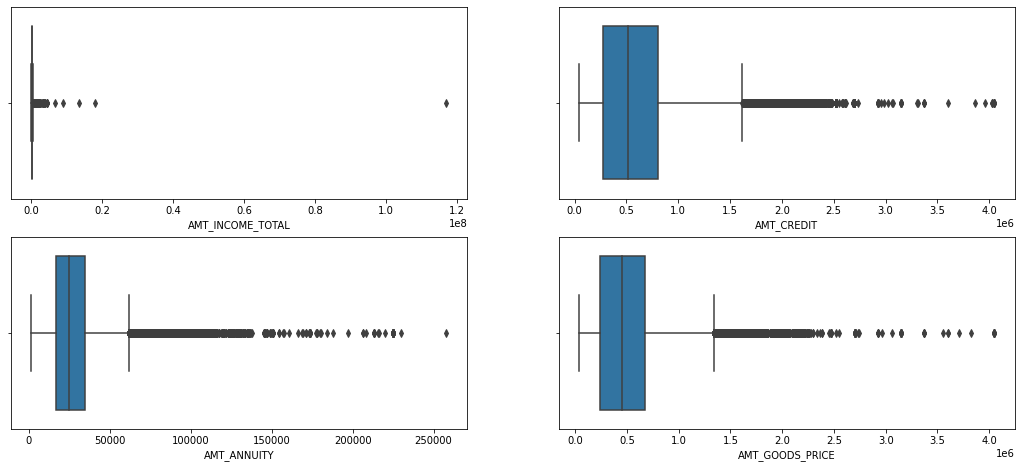

In [46]:
reqCols = ['AMT_INCOME_TOTAL' , 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
plt.figure(figsize=[18, 12])
for i in range(len(reqCols)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df1[reqCols[i]])


In [47]:
# AMT_INCOME_TOTAL

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


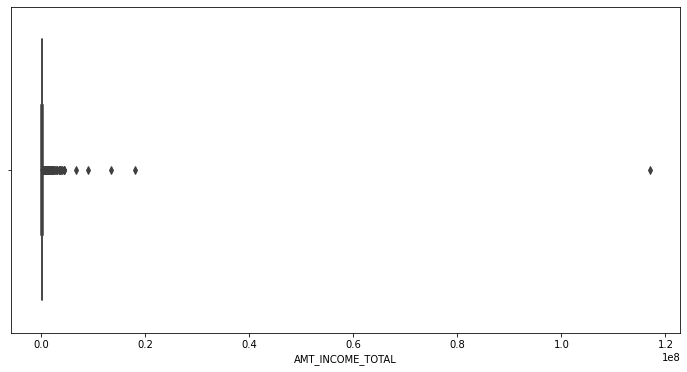

In [48]:
plt.figure(figsize=[12, 6])
sns.boxplot(df1['AMT_INCOME_TOTAL'])
plt.show()

In [49]:
df1['AMT_INCOME_TOTAL'].describe()

count    3.045310e+05
mean     1.686634e+05
std      2.378910e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.476000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Binning the AMT_INCOME_TOTAL

0-100000 to 0-100K

100000-200000 to 100k-200k

200000-300000 to 200k-300k

300000-400000 to 300k-400k

400000 and above to >400k

In [50]:
df1['AMT_INCOME_GROUP'] = pd.cut(df1['AMT_INCOME_TOTAL'],[0,100000,200000,300000,400000,100000000], labels=['<100K', '100k-200k', '200k-300k', '300k-400k', '>400k'])
df1['AMT_INCOME_GROUP'].head(10)

0    200k-300k
1    200k-300k
2        <100K
3    100k-200k
4    100k-200k
5        <100K
6    100k-200k
7    300k-400k
8    100k-200k
9    100k-200k
Name: AMT_INCOME_GROUP, dtype: category
Categories (5, object): ['<100K' < '100k-200k' < '200k-300k' < '300k-400k' < '>400k']

In [51]:
df1['AMT_INCOME_GROUP'].value_counts()

100k-200k    154508
200k-300k     64566
<100K         63051
300k-400k     14518
>400k          7887
Name: AMT_INCOME_GROUP, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

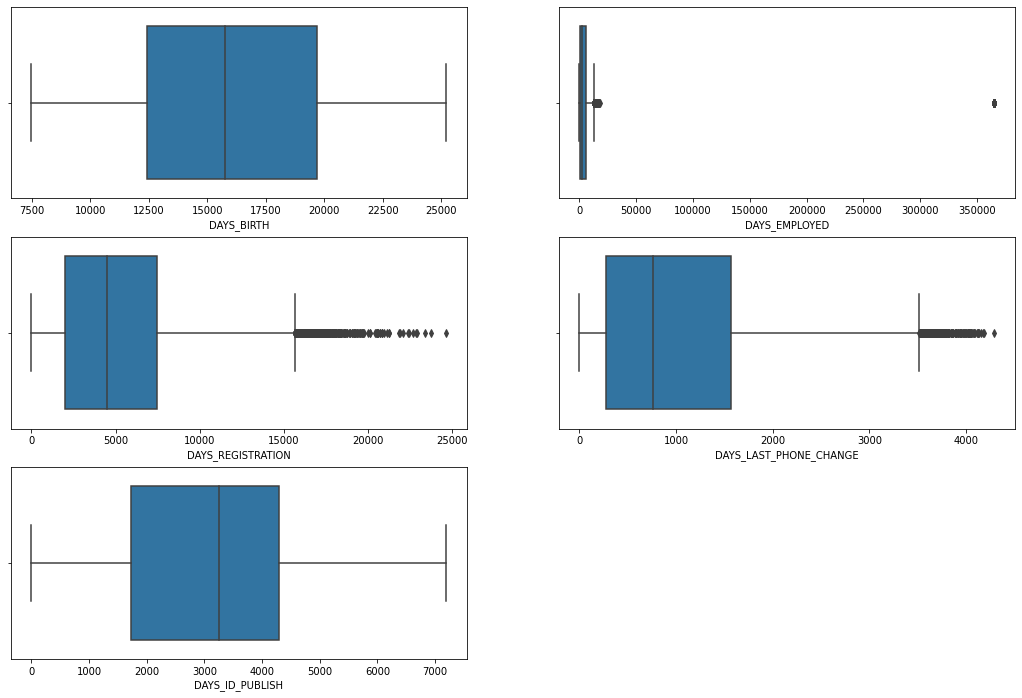

In [52]:
reqCols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH']
plt.figure(figsize=[18, 12])
for i in range(len(reqCols)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df1[reqCols[i]])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


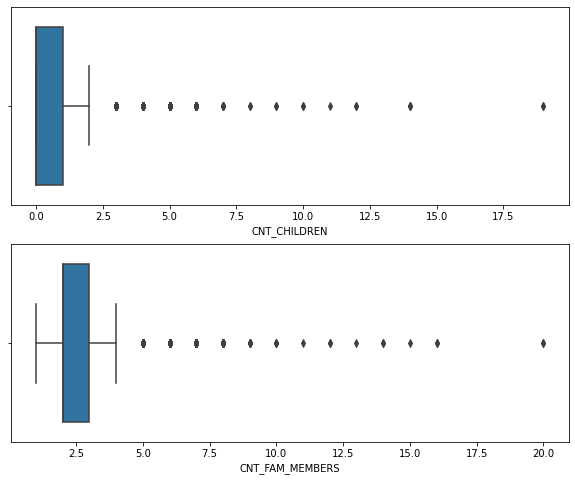

In [53]:
reqCols = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']
plt.figure(figsize=[10, 8])
for i in range(len(reqCols)):
    plt.subplot(2, 1, i+1)
    sns.boxplot(df1[reqCols[i]])
plt.show()

In [54]:
df1['CNT_CHILDREN'].describe()

count    304531.000000
mean          0.417140
std           0.722308
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [55]:
df1 = df1[~(df1['CNT_FAM_MEMBERS']>16)]
df1 = df1[~(df1['CNT_CHILDREN']>12)]
print(df1.shape)
df1.head()

(304526, 74)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,<100K
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,100k-200k
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100k-200k


**Imbalance check**

Imbalance means that the number of data points available for different the classes is different:

If there are two classes, then balanced data would mean 50% points for each of the class.

In [56]:
df1['TARGET'].value_counts(normalize=True)*100

0    91.899871
1     8.100129
Name: TARGET, dtype: float64

 0 means client has no problem in paying the installments or the loan amount, 1 means has difficulties in paying

*   92% of the customers have no problem in paying the amount (non-defaulter)
*   8% of the clients have problem in paying (defaulter)



#Uni-Variate Analysis

### Categorical Unordered Variables

Columns taken NAME_CONTRACT_TYPE, CODE_GENDER, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, OCCUPATION_TYPE and ORGANIZATION_TYPE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

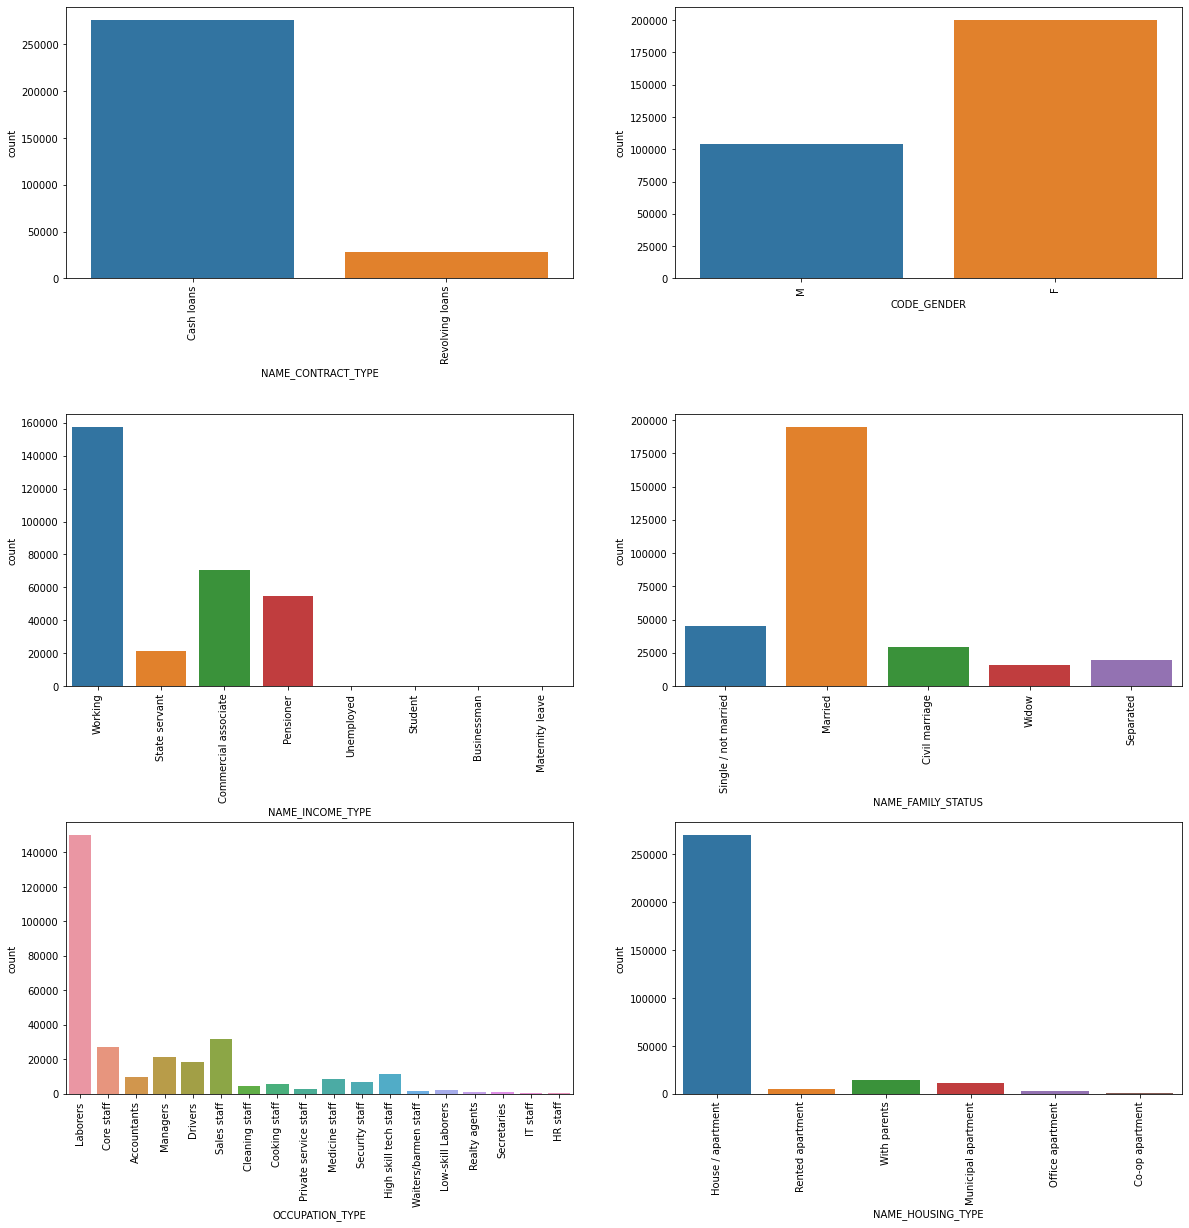

In [57]:
CatUnOrList = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE']
plt.figure(figsize=[20,20])
for i in range(len(CatUnOrList)):
    plt.subplot(3,2, i+1)
    sns.countplot(df1[CatUnOrList[i]])
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
plt.show()

Inference from the graphs:



*   Revolving loan* type are taken by very few clients

*   The number of female clients are almost twice the male
*   Number of loans taken by working professionals is more followed by commercial associate


*   Higher number of loans are taken by married clients

*   Laborers have more chances of taking loan
*   Most of the clients live in their own house/apartment





###  Categorical Ordered Univariate Analysis

Columns taken NAME_EDUCATION_TYPE, FLAG_OWN_CAR, AMT_INCOME_GROUP and FLAG_OWN_REALTY

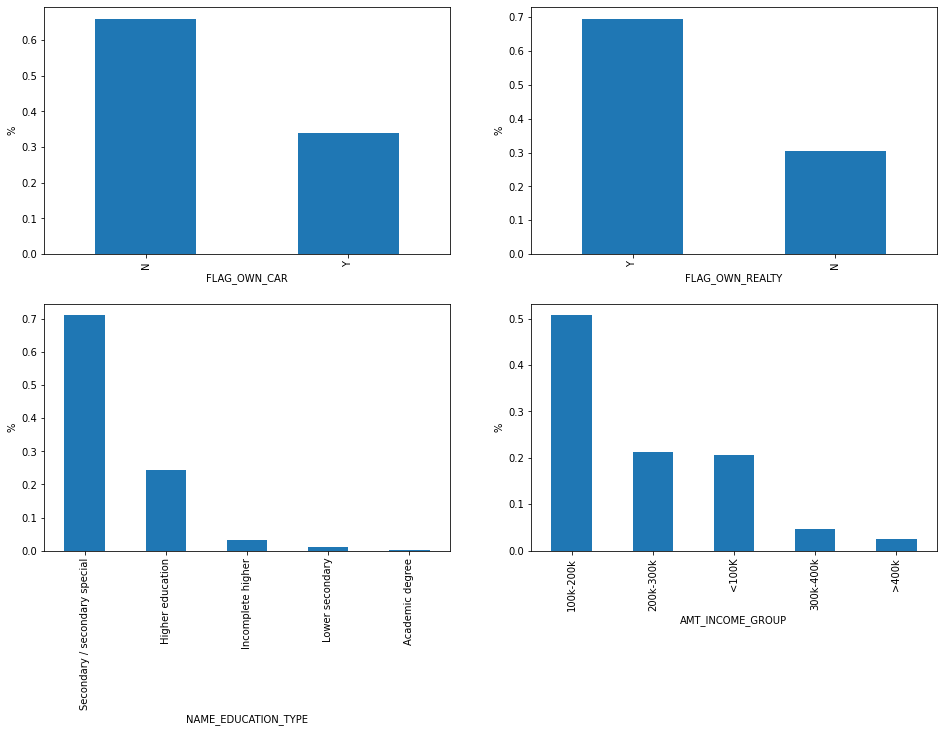

In [58]:
CatOrList = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'AMT_INCOME_GROUP']
plt.figure(figsize=[16,10])
for i in range(len(CatOrList)):
    plt.subplot(2,2, i+1)
    df1[CatOrList[i]].value_counts(normalize=True).plot(kind='bar',stacked=True)
    plt.subplots_adjust(hspace=0.2)
    plt.xlabel(CatOrList[i])
    plt.ylabel('%')
    plt.xticks(rotation=90)

**Inference on the above graphs**



*   More than 60% of the clients dont have a car

*   Around 70% of them own a property
*   Most of the clients have done only secondary education


*   Income group of 100000 - 200000 are highest among the category who have have taken the loans


### Numerical Variables Univariate Analysis

Columns taken DAYS_BIRTH, DAYS_EMPLOYED, AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, CNT_FAM_MEMBERS and CNT_CHILDREN

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

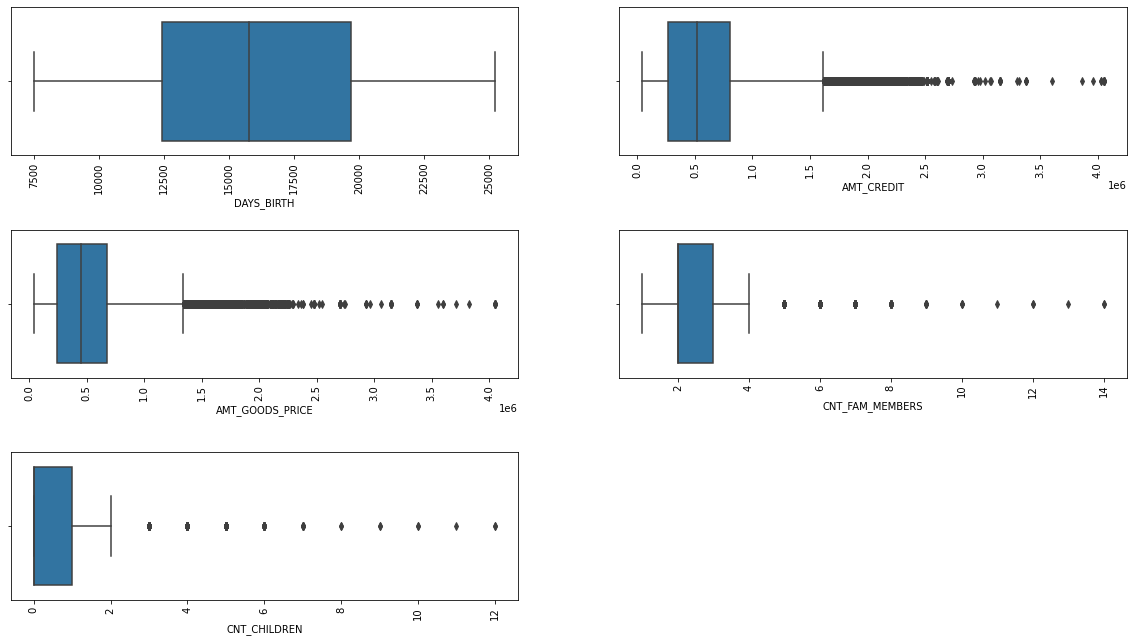

In [59]:
reqCols = ['DAYS_BIRTH', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']
plt.figure(figsize=[20,15])
for i in range(len(reqCols)):
    plt.subplot(4,2, i+1)
    sns.boxplot(df1[reqCols[i]])
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)

Inference on the above graphs


*   Days birth is almost evenly distributed, in other words clients of different age groups are seen.

*   50% of the clients do not have a child (this may indicate that most of them are young or may be single)
*   Chances of loan being taken by client who has no child is more
*   Most of the clients have taken loan amount of 10,00,000 and below



*   List item



In [60]:
#Binning the AMT_Credit for futher analysis

In [61]:
df1['AMT_CREDIT_GROUP'] = pd.cut(df1['AMT_CREDIT'], [0, 200000, 400000, 600000, 800000, 1000000, 9999999999], labels=['<200k', '200k-400k', '400k-600k', '600k-800k', '800k-1000k', '>1000k'])
df1['AMT_CREDIT_GROUP'].head()

0    400k-600k
1       >1000k
2        <200k
3    200k-400k
4    400k-600k
Name: AMT_CREDIT_GROUP, dtype: category
Categories (6, object): ['<200k' < '200k-400k' < '400k-600k' < '600k-800k' < '800k-1000k' < '>1000k']

# Bi - Variate Analysis

###Target vs Categorical variable


Target vs 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE'
Target vs 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'AMT_INCOME_GROUP', 'AMT_CREDIT_GROUP'

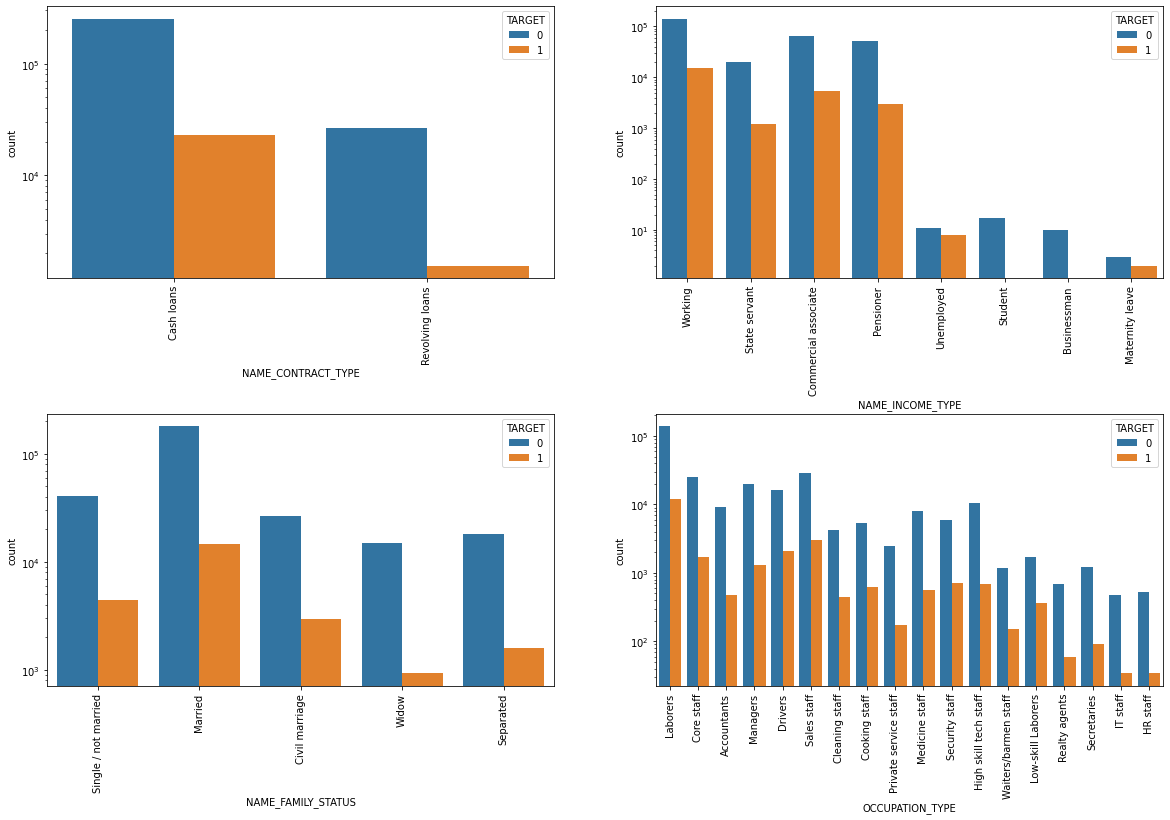

In [62]:
CatUnOrList = ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
plt.figure(figsize=[20,20])
for i in range(len(CatUnOrList)):
    plt.subplot(3,2, i+1)
    plt.yscale('log')
    sns.countplot(data=df1, x=CatUnOrList[i], hue='TARGET')
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
plt.show()

**Inference from the above graph**

*   NAME_CONTRACT_TYPE: Revolving loan type has less number of defaulters.
*   NAME_INCOME_TYPE: Business man and students groups have higher chances of repaying the loans. Chances that an unemployed become a defaulter is more




*   NAME_FAMILY_STATUS: Widow category has less chances of becoming defaulter whereas married has high chances. Civil marriage category have less defaulters compared to the single
*   OCCUPATION_TYPE: IT staff, HR staff and Realty agents have less defaulters whereas sales staff, laborers and drivers have more defaulters



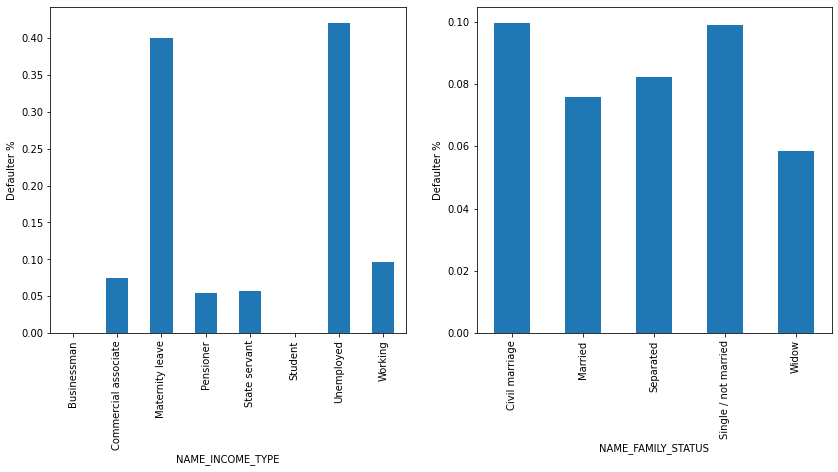

In [63]:
plt.figure(figsize=[14,6])
plt.subplot(1,2, 1)
df1.groupby('NAME_INCOME_TYPE')['TARGET'].mean().plot.bar()
plt.ylabel('Defaulter %')

plt.subplot(1,2, 2)
df1.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().plot.bar()
plt.ylabel('Defaulter %')

plt.show()

**Inference of the above graphs**



*  NAME_INCOME_TYPE: Around 40% of the clients who are unemployed or on maternity leave are defaulters

*   NAME_FAMILY_STATUS: 10% of clients with civil marriage or single are defaulters
*   Example; Out of 100 unemployed clients, around 40 clients fail to pay the loan


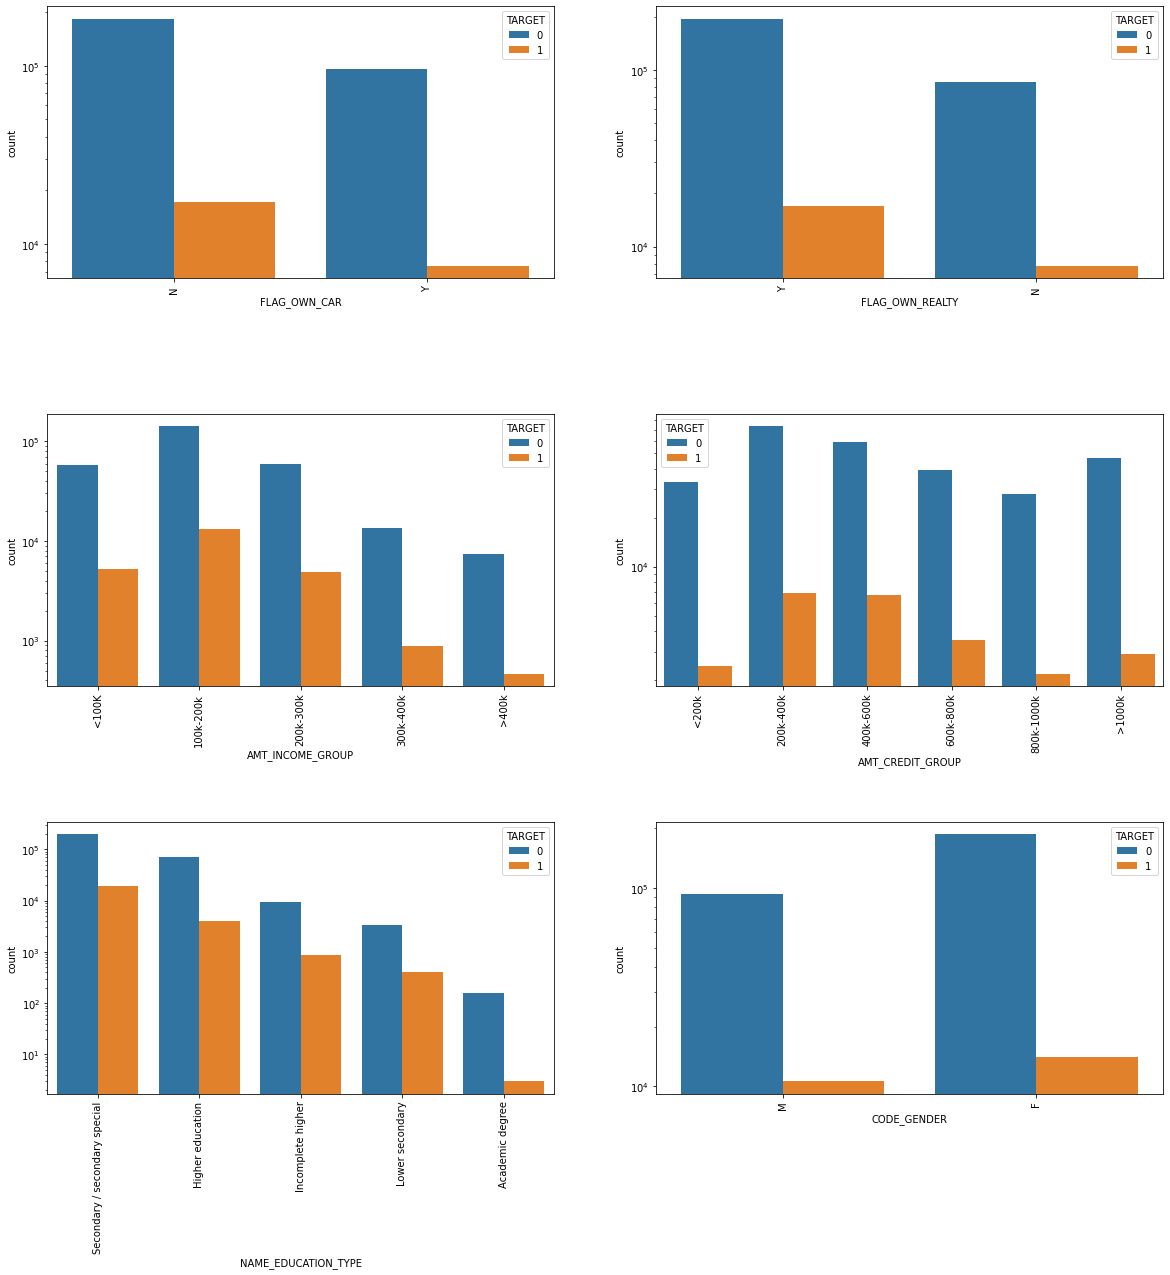

In [64]:
CatOrList = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_GROUP', 'AMT_CREDIT_GROUP', 'NAME_EDUCATION_TYPE', 'CODE_GENDER']
plt.figure(figsize=[20,20])
for i in range(len(CatOrList)):
    plt.subplot(3,2, i+1)
    plt.yscale('log')
    sns.countplot(data=df1, x=CatOrList[i], hue='TARGET')
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
plt.show()

**Inference from the above graphs**



*   FLAG_OWN_CAR: Clients having a car have comparatively less number of defaulters

*   FLAG_OWN_REALTY: Clients with no property have lesser chance to become defaulters

*   AMT_INCOME_GROUP: Income group of 1,00,000-2,00,000 has higher number of defaulters whereas >4,00,000 has least
*  AMT_CREDIT_GROUP: Credit Groups 2,00,000-4,00,000 and 4,00,000-6,00,000 have higher number of defaulters whereas 8,00,000-10,00,000 have less number of defaulters

*   NAME_EDUCATION_TYPE: Academic degree group has lowest number of defaulters




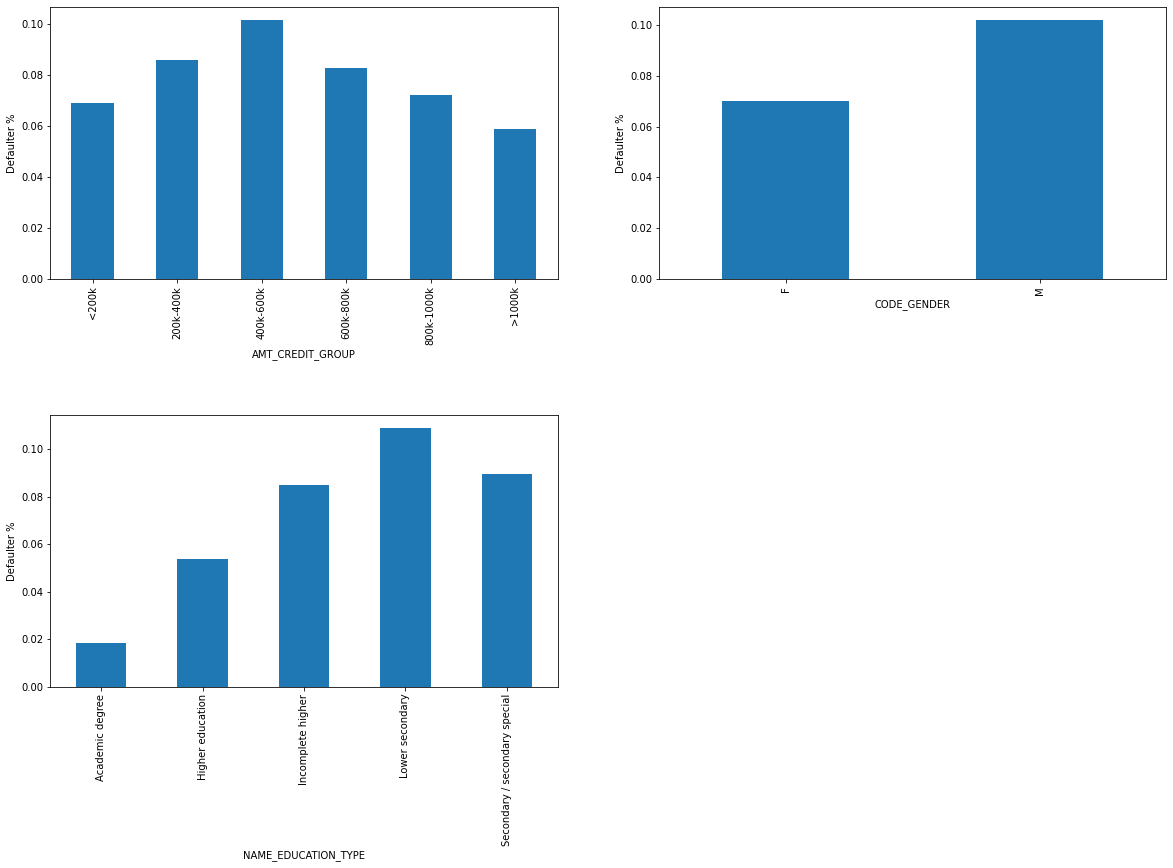

In [65]:
CatOrList = ['AMT_CREDIT_GROUP', 'CODE_GENDER', 'NAME_EDUCATION_TYPE']
plt.figure(figsize=[20,20])
for i in range(len(CatOrList)):
    plt.subplot(3,2, i+1)
    df1.groupby(CatOrList[i])['TARGET'].mean().plot.bar()
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
    plt.ylabel('Defaulter %')
    
plt.show()

**Inference from the above graphs**



*   AMT_CREDIT_GROUP: 10% of the clients who have taken loan amount in the range of 4,00,000-5,00,000 became defaulters

*   CODE_GENDER: 10% of Male clients become defaulters
*   NAME_EDUCATION_TYPE: More than 10% of the clients with lower secondary education become defaulters


*   Explanation: Example- Out of 100 male clients, 10 male fail to repay the loan. Same follows for the AMT_CREDIT_GROUP and NAME_EDUCATION_TYPE



###Target vs Numerical


Target vs 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'EXT_SOURCE_2'

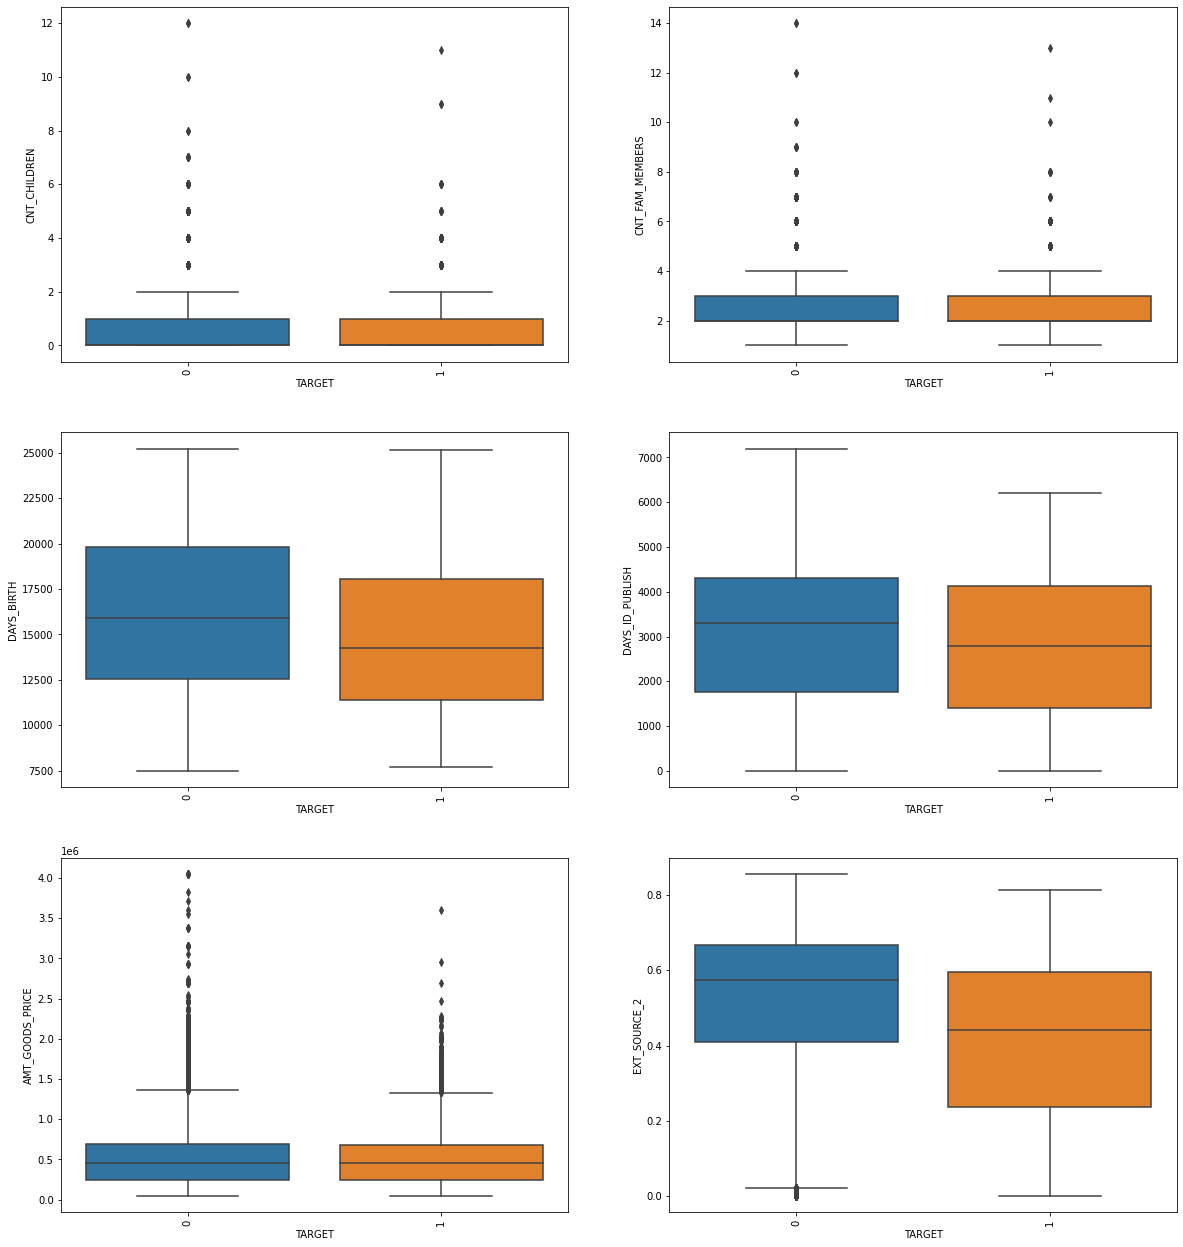

In [66]:
numCols = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2']
plt.figure(figsize=[20,30])
for i in range(len(numCols)):
    plt.subplot(4,2, i+1)
    sns.boxplot(data=df1, y=numCols[i], x='TARGET')
    plt.xticks(rotation=90)
plt.show()

**Inference on the above graphs**



*   DAYS_BIRTH: If the days_birth (age of client) is more than 15000 (around 40 years of age) then chances of becoming defaulter is less. Or 40+ age client are most likely to repay the loan

*   DAYS_ID_PUBLISH: If the change of the ID is done few days before the application chances are that he becomes a defaulter
*   AMT_GOODS_PRICE: Clients with loan taken above 35,00,000 goods price are less defaulters. (But this is not a strong trend because of the outliers)


*   EXT_SOURCE_2: Low score indicates signs of defaulter. Score above 0.55 have high chance of repayment



### Spliting the data into target variable and analyze

In [67]:
target1 = df1[df1['TARGET'] == 1]
target0 = df1[df1['TARGET'] == 0]

print(target1.shape)
print(target0.shape)

(24667, 75)
(279859, 75)


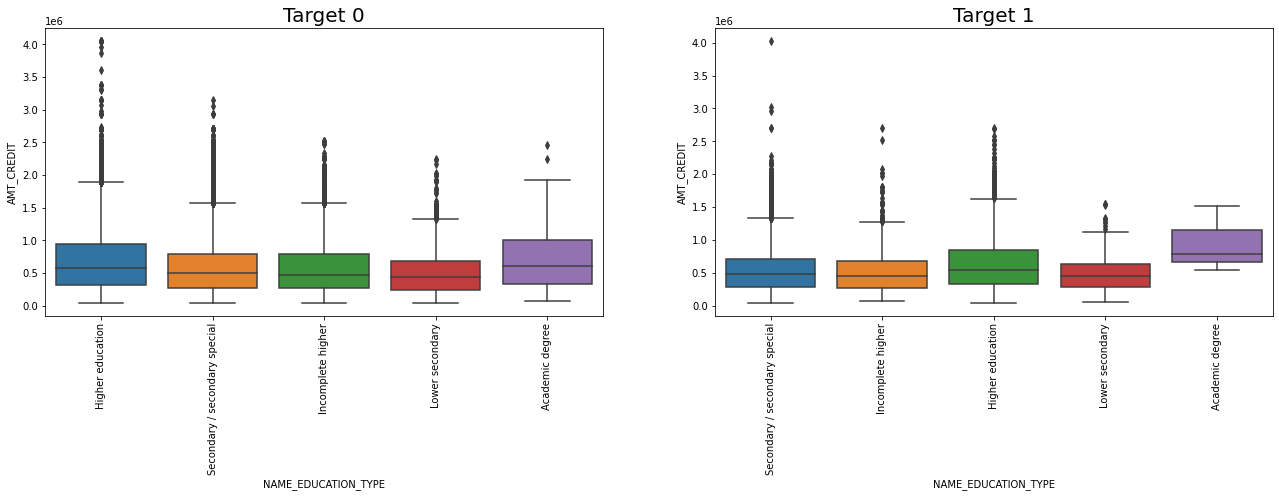

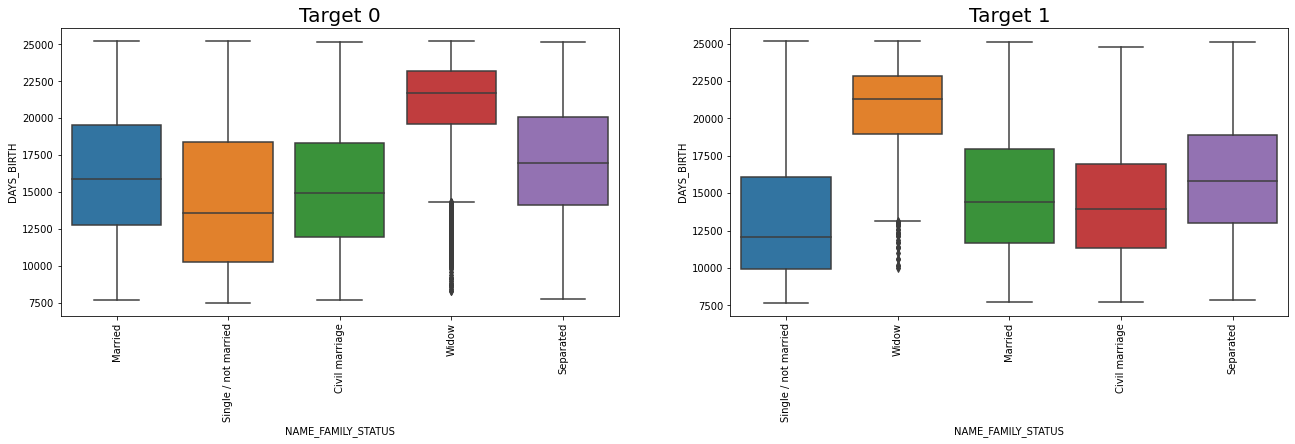

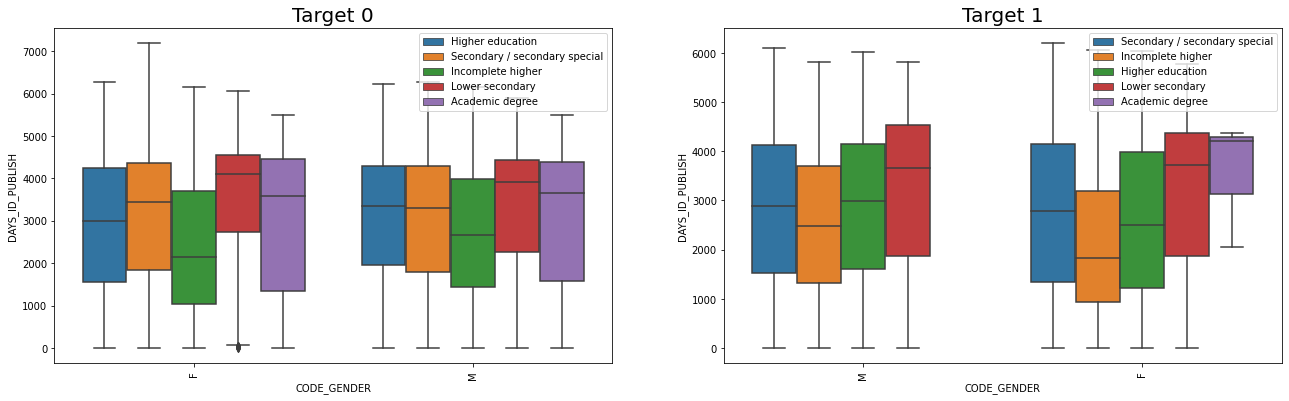

In [68]:
plt.figure(figsize=[22, 18])

plt.subplot(3,2,1)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', data=target0)
plt.title('Target 0', fontsize='20')
plt.xticks(rotation=90)

plt.subplot(3,2,2)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', data=target1)
plt.title('Target 1', fontsize='20')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=[22, 18])

plt.subplot(3,2,3)
sns.boxplot(x='NAME_FAMILY_STATUS',y='DAYS_BIRTH', data=target0)
plt.title('Target 0', fontsize='20')
plt.xticks(rotation=90)

plt.subplot(3,2,4)
sns.boxplot(x='NAME_FAMILY_STATUS',y='DAYS_BIRTH', data=target1)
plt.title('Target 1', fontsize='20')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=[22, 21])


plt.subplot(3,2,5)
sns.boxplot(x='CODE_GENDER',y='DAYS_ID_PUBLISH', data=target0, hue='NAME_EDUCATION_TYPE')
plt.title('Target 0', fontsize='20')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(3,2,6)
sns.boxplot(x='CODE_GENDER',y='DAYS_ID_PUBLISH', data=target1, hue='NAME_EDUCATION_TYPE')
plt.title('Target 1', fontsize='20')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.show()

**The two graphs side by side are w.r.t to target variables i.e target 0 and target 1**


*   NAME_EDUCATION_TYPE vs AMT_CREDIT: Clients with higher education and academic degree find hard to pay the loan if the loan amount is above 5,00,000
*   NAME_FAMILY_STATUS vs DAYS_BIRTH: If the client is single and has days birth (or age) below 12500 days (35 years age) has more chances of becoming defaulter.

*   CODE_GENDER vs DAYS_ID_PUBLISH: Female clients with incomplete higer education and have changed their identity document below 2000 days before the application have high number of defaulters






#Multi - Variate Analysis




*   AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE vs Target
*   AMT_INCOME_TOTAL vs CODE_GENDER vs Target

*   NAME_EDUCATION_TYPE vs AMT_CREDIT_GROUP vs Target
*   NAME_FAMILY_STATUS vs AMT_INCOME_GROUP vs Target






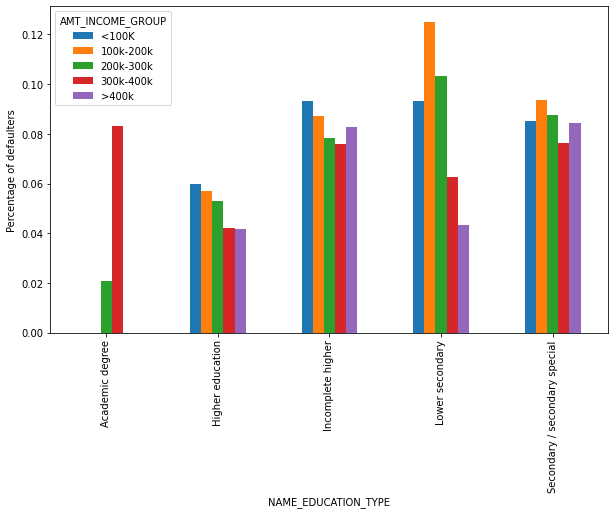

In [69]:
df1.pivot_table(index='NAME_EDUCATION_TYPE', columns='AMT_INCOME_GROUP', values='TARGET', aggfunc='mean').plot.bar(figsize=[10,6])
plt.ylabel('Percentage of defaulters')
plt.show()

**Inference on the above graphs**

*  AMT_INCOME_TOTAL vs NAME_EDUCATION_TYPE vs Target: 

    Clients with academic degree in the income range of 3,00,000-4,00,000 have higher defaulters. Clients with lower scondary education in the income range of 1,00,000-2,00,000 have higher defaulters.

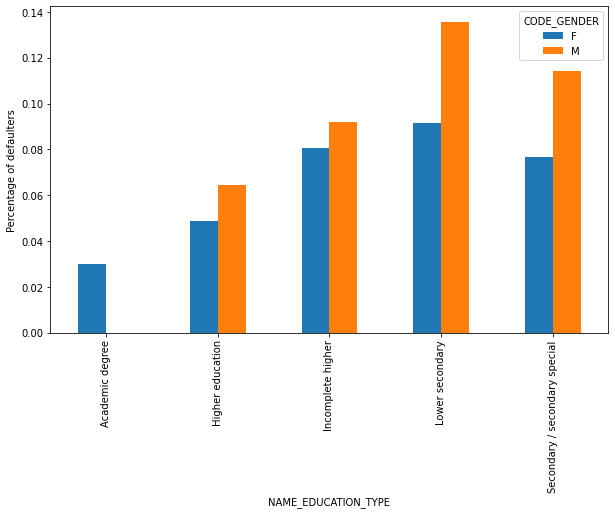

In [70]:
df1.pivot_table(index='NAME_EDUCATION_TYPE', columns='CODE_GENDER', values='TARGET', aggfunc='mean').plot.bar(figsize=[10,6])
plt.ylabel('Percentage of defaulters')
plt.show()

**Inference on the above graphs**

*  NAME_EDUCATION_TYPE vs CODE_GENDER vs TARGET: 

  Male and Female with lower secondary have high percentage of defaulters whereas Male and Female with academic degree the lowest

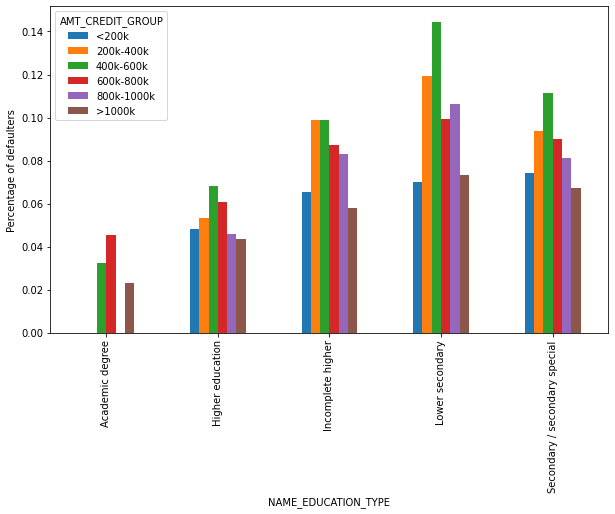

In [71]:
df1.pivot_table(index='NAME_EDUCATION_TYPE', columns='AMT_CREDIT_GROUP', values='TARGET', aggfunc='mean').plot.bar(figsize=[10,6])
plt.ylabel('Percentage of defaulters')
plt.show()

**Inference on the above graphs**

* NAME_EDUCATION_TYPE vs AMT_CREDIT_GROUP vs Target: 

  More than 14% of the clients with lower secondary education and have taken loan amount between 4,00,000-6,00,000 are defaulters

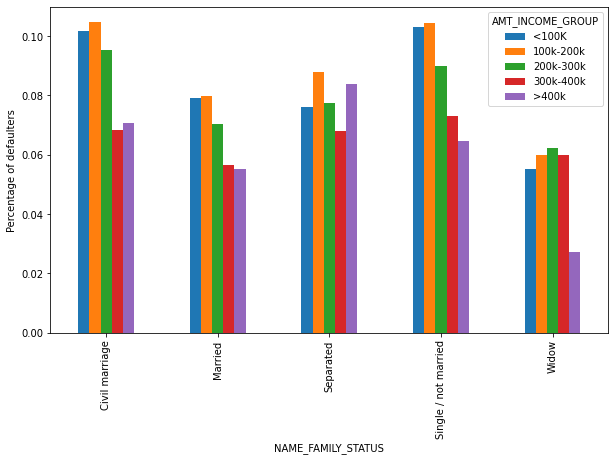

In [72]:
df1.pivot_table(index='NAME_FAMILY_STATUS', columns='AMT_INCOME_GROUP', values='TARGET', aggfunc='mean').plot.bar(figsize=[10,6])
plt.ylabel('Percentage of defaulters')
plt.show()

* NAME_FAMILY_STATUS vs AMT_INCOME_GROUP vsTarget:    Clients with civil marriage or who is single find hard to repay the loan

#Feature Engineering

### Multicollinearity

In [73]:
import plotly.graph_objs as go
from plotly.offline import plot, iplot

corr = df_num.corr()
trace = go.Heatmap(z=corr.values.tolist(), x=df_num.columns, y=df_num.columns)
data=[trace]
layout = go.Layout(
    title='Heatmap of pairwise correlation of the columns',
    autosize=False,
    width=850,
    height=700,
    yaxis=go.layout.YAxis(automargin=True),
    xaxis=dict(tickangle=40),
    margin=go.layout.Margin(l=0, r=200, b=200, t=80)
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap1')

### Encoding 

In [74]:
for i in df1.columns:
  if df1[i].dtypes == 'object':
    print(i,df1[i].unique())
    print("                      ")

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
                      
CODE_GENDER ['M' 'F']
                      
FLAG_OWN_CAR ['N' 'Y']
                      
FLAG_OWN_REALTY ['Y' 'N']
                      
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
                      
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
                      
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
                      
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
                      
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
                      
OCCUPATION_TYPE ['Laborers' 'Core staff' 'Accountants' 'Managers' 'D

### Dummy encoding

In [75]:
#FLAG_OWN_CAR
df1['FLAG_OWN_CAR']=pd.get_dummies(df1['FLAG_OWN_CAR'],drop_first = True)

In [76]:
#FLAG_OWN_REALTY
df1['FLAG_OWN_REALTY']=pd.get_dummies(df1['FLAG_OWN_REALTY'],drop_first = True)

In [77]:
#CODE_GENDER
df1['CODE_GENDER']=pd.get_dummies(df1['CODE_GENDER'],drop_first = True)

In [78]:
#NAME_CONTRACT_TYPE
df1['NAME_CONTRACT_TYPE']=pd.get_dummies(df1['NAME_CONTRACT_TYPE'],drop_first = True)

In [79]:
#FLAG_OWN_REALTY
df1['FLAG_OWN_REALTY']=pd.get_dummies(df1['FLAG_OWN_REALTY'],drop_first = True)

### Ordinal Encoding

In [80]:
# ordinal encoding

column = ['WEEKDAY_APPR_PROCESS_START','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','NAME_TYPE_SUITE']
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

for i in column:
  df1[column] = ord_enc.fit_transform(df1[column])


### Label Encoding

In [81]:
column = ['AMT_INCOME_GROUP','AMT_CREDIT_GROUP']
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

for i in column:
  df1[column] = ord_enc.fit_transform(df1[column])

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304526 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304526 non-null  int64  
 1   TARGET                       304526 non-null  int64  
 2   NAME_CONTRACT_TYPE           304526 non-null  uint8  
 3   CODE_GENDER                  304526 non-null  uint8  
 4   FLAG_OWN_CAR                 304526 non-null  uint8  
 5   FLAG_OWN_REALTY              304526 non-null  uint8  
 6   CNT_CHILDREN                 304526 non-null  int64  
 7   AMT_INCOME_TOTAL             304526 non-null  float64
 8   AMT_CREDIT                   304526 non-null  float64
 9   AMT_ANNUITY                  304526 non-null  float64
 10  AMT_GOODS_PRICE              304526 non-null  float64
 11  NAME_TYPE_SUITE              304526 non-null  float64
 12  NAME_INCOME_TYPE             304526 non-null  float64
 13 

In [83]:
df1.drop('ORGANIZATION_TYPE',axis = 1,inplace = True)

In [84]:
df1.drop('SK_ID_CURR',axis = 1,inplace = True)

In [85]:
df1['AMT_INCOME_GROUP'].fillna(0,inplace = True)

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304526 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       304526 non-null  int64  
 1   NAME_CONTRACT_TYPE           304526 non-null  uint8  
 2   CODE_GENDER                  304526 non-null  uint8  
 3   FLAG_OWN_CAR                 304526 non-null  uint8  
 4   FLAG_OWN_REALTY              304526 non-null  uint8  
 5   CNT_CHILDREN                 304526 non-null  int64  
 6   AMT_INCOME_TOTAL             304526 non-null  float64
 7   AMT_CREDIT                   304526 non-null  float64
 8   AMT_ANNUITY                  304526 non-null  float64
 9   AMT_GOODS_PRICE              304526 non-null  float64
 10  NAME_TYPE_SUITE              304526 non-null  float64
 11  NAME_INCOME_TYPE             304526 non-null  float64
 12  NAME_EDUCATION_TYPE          304526 non-null  float64
 13 

In [87]:
Total = df1.isnull().sum().sort_values(ascending=False)  
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data.head(2)

,Total,Percentage of Missing Values
TARGET,0,0.0
LIVE_CITY_NOT_WORK_CITY,0,0.0


### Feature scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
standard_df=scale.fit_transform(df1)
standard_df = pd.DataFrame(standard_df,columns = df1.columns)
standard_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_GROUP,AMT_CREDIT_GROUP
0,1.0,0.0,1.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.25,0.2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.25,1.0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.75,0.8
3,0.0,0.0,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.00,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.2


###  Train test split

In [89]:
import statsmodels.api as sm
X = df1.drop('TARGET',1)
y = df1['TARGET']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [90]:
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

### Class imbalance

In [92]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [93]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X, y)
X_train_res.shape,y_train_res.shape

((559718, 72), (559718,))

In [94]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 279859, 1: 24667})
Resampled dataset shape Counter({1: 279859, 0: 279859})


#Model Building

In [95]:
# Base model - without any tuning or scaling

### Logistic Regression

In [96]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import statsmodels.api as sm



In [97]:
logreg = sm.Logit(y_train,X_train).fit()
print(logreg.summary())

         Current function value: 0.250755
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               243620
Model:                          Logit   Df Residuals:                   243548
Method:                           MLE   Df Model:                           71
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                  0.1061
Time:                        15:14:46   Log-Likelihood:                -61089.
converged:                      False   LL-Null:                       -68339.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE              0.0485      0.067      0.721      0.471      -0.083       0.180
CODE_GENDER                     0.4245      0.017     24.392      0.000       0.

In [98]:
logreg.params[:5]

NAME_CONTRACT_TYPE    0.048507
CODE_GENDER           0.424524
FLAG_OWN_CAR         -0.266609
FLAG_OWN_REALTY       0.028078
CNT_CHILDREN          0.342856
dtype: float64

In [99]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

,Odds
NAME_CONTRACT_TYPE,1.049703
CODE_GENDER,1.528863
FLAG_OWN_CAR,0.765973
FLAG_OWN_REALTY,1.028476
CNT_CHILDREN,1.408966
...,...
AMT_REQ_CREDIT_BUREAU_MON,0.948313
AMT_REQ_CREDIT_BUREAU_QRT,0.922839
AMT_REQ_CREDIT_BUREAU_YEAR,1.002677
AMT_INCOME_GROUP,1.002413


In [100]:
# training set
train_prob = logreg.predict(X_train)

In [101]:
train_pred = [0 if val<0.5 else 1 for val in train_prob ]
train_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [102]:
# test set
test_prob = logreg.predict(X_test)
test_prob[0:10]

218624    0.024104
6809      0.046971
269592    0.020938
35947     0.105638
31380     0.014849
55132     0.126057
62814     0.183924
36742     0.194374
57807     0.044572
143973    0.026576
dtype: float64

In [103]:
test_pred = [0 if val<0.5 else 1 for val in test_prob ]
test_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [104]:
from sklearn.metrics import log_loss
log_loss(y_test, test_pred)

2.8393868812132874

In [105]:
print(classification_report(y_train, train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    223956
           1       0.47      0.01      0.02     19664

    accuracy                           0.92    243620
   macro avg       0.70      0.50      0.49    243620
weighted avg       0.88      0.92      0.88    243620

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55903
           1       0.48      0.01      0.02      5003

    accuracy                           0.92     60906
   macro avg       0.70      0.50      0.49     60906
weighted avg       0.88      0.92      0.88     60906



Training set


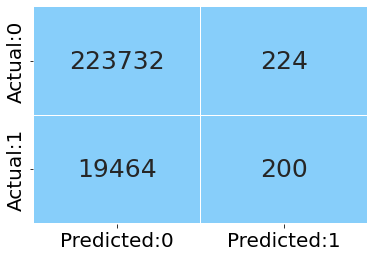

Test set


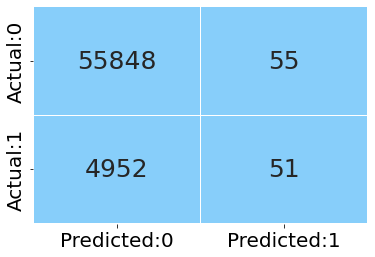

In [106]:
from matplotlib.colors import ListedColormap

cm = confusion_matrix(y_train, train_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
print('Training set')
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

from matplotlib.colors import ListedColormap

cm = confusion_matrix(y_test,test_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
print('Test set')
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

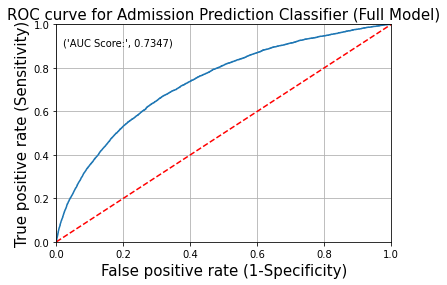

In [107]:
fpr, tpr, thresholds = roc_curve(y_test, test_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, test_prob),4)))
plt.grid(True)

In [108]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

In [109]:
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

In [110]:
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

In [111]:
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.667200,0.314670,0.081381,0.352530
1,0.670997,0.318498,0.080683,0.352499
2,0.666600,0.314151,0.081479,0.352449
3,0.670798,0.318409,0.080693,0.352389
4,0.667000,0.314616,0.081396,0.352383


In [112]:
y_pred_youden = [ 0 if x < 0.53 else 1 for x in test_prob]


### Logistic Regression 

In [113]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_res,y_train_res)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

print(classification_report(y_train, train_pred))
print(classification_report(y_test,test_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.94      0.61      0.74    223956
           1       0.11      0.54      0.18     19664

    accuracy                           0.61    243620
   macro avg       0.52      0.58      0.46    243620
weighted avg       0.87      0.61      0.70    243620

              precision    recall  f1-score   support

           0       0.94      0.61      0.74     55903
           1       0.11      0.54      0.19      5003

    accuracy                           0.61     60906
   macro avg       0.52      0.58      0.46     60906
weighted avg       0.87      0.61      0.70     60906



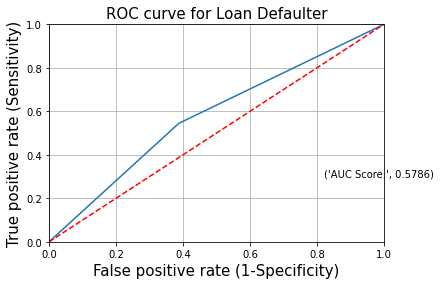

In [115]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test,test_pred),4)))
    plt.grid(True)

plot_roc(lr)

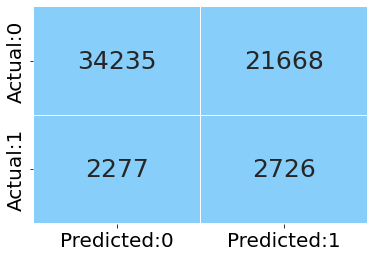

In [116]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

plot_confusion_matrix(lr)

### Naive Bayes

In [117]:
X = standard_df.drop('TARGET',1)
y = standard_df['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [119]:

from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X, y)
X_train_res.shape,y_train_res.shape

((559718, 72), (559718,))

In [120]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_res,y_train_res)

GaussianNB()

In [121]:
train_pred = gaussian_nb.predict(X_train)
test_pred = gaussian_nb.predict(X_test)

In [122]:
print(accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred))
print(classification_report(y_test,test_pred))

0.1151383301863558
              precision    recall  f1-score   support

         0.0       0.95      0.04      0.08    223956
         1.0       0.08      0.98      0.15     19664

    accuracy                           0.12    243620
   macro avg       0.52      0.51      0.11    243620
weighted avg       0.88      0.12      0.08    243620

              precision    recall  f1-score   support

         0.0       0.96      0.04      0.08     55903
         1.0       0.08      0.98      0.15      5003

    accuracy                           0.12     60906
   macro avg       0.52      0.51      0.12     60906
weighted avg       0.88      0.12      0.08     60906



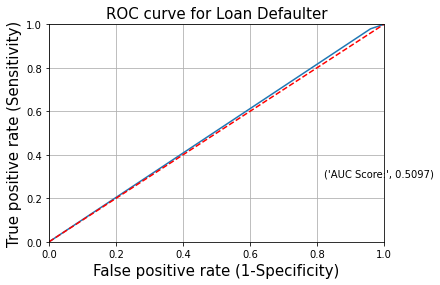

In [123]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test,test_pred),4)))
    plt.grid(True)
plot_roc(gaussian_nb)

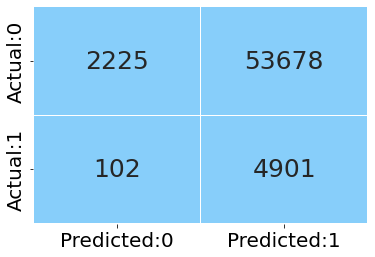

In [124]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()


plot_confusion_matrix(gaussian_nb)

###KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res,y_train_res)


KNeighborsClassifier()

In [126]:

test_pred = knn.predict(X_test)

In [127]:

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93     55903
         1.0       0.40      1.00      0.57      5003

    accuracy                           0.88     60906
   macro avg       0.70      0.93      0.75     60906
weighted avg       0.95      0.88      0.90     60906



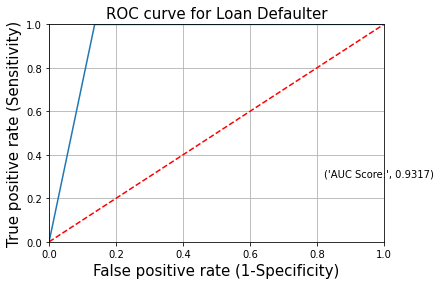

In [128]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test,test_pred),4)))
    plt.grid(True)
plot_roc(knn)

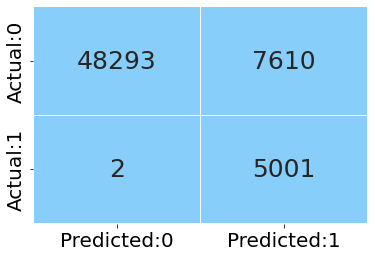

In [129]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()


plot_confusion_matrix(knn)

### Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 10)
dt.fit(X_train_res,y_train_res)

DecisionTreeClassifier(random_state=10)

In [131]:
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

In [132]:
print(classification_report(y_train, train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    223956
         1.0       1.00      1.00      1.00     19664

    accuracy                           1.00    243620
   macro avg       1.00      1.00      1.00    243620
weighted avg       1.00      1.00      1.00    243620

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55903
         1.0       1.00      1.00      1.00      5003

    accuracy                           1.00     60906
   macro avg       1.00      1.00      1.00     60906
weighted avg       1.00      1.00      1.00     60906



In [133]:
dt.feature_importances_

array([2.48276609e-03, 6.29344146e-03, 5.42668109e-03, 4.34572509e-03,
       6.05956341e-03, 3.77861290e-02, 4.12016567e-02, 5.20358035e-02,
       2.85095952e-02, 8.90250325e-03, 6.99773324e-03, 1.14644847e-02,
       1.28257197e-02, 7.10240129e-03, 4.35326545e-02, 5.82738981e-02,
       6.00983035e-02, 5.46798152e-02, 5.80526430e-02, 0.00000000e+00,
       4.03597897e-04, 3.53911607e-03, 1.52616722e-04, 4.91011476e-03,
       3.20269860e-03, 2.09101851e-02, 8.29630548e-03, 3.88734578e-03,
       4.38170224e-03, 1.69943210e-02, 3.18180545e-02, 8.88599588e-04,
       8.61920835e-04, 2.11583289e-03, 3.98897279e-03, 3.27319747e-03,
       2.60179809e-03, 1.30745817e-01, 1.07222548e-01, 1.07570131e-02,
       4.10445548e-03, 1.01330809e-02, 4.39513418e-03, 5.30704192e-02,
       5.24564598e-05, 4.35982082e-03, 0.00000000e+00, 1.77507122e-03,
       1.44348484e-03, 0.00000000e+00, 2.55026408e-03, 3.00488192e-04,
       0.00000000e+00, 2.36571044e-04, 0.00000000e+00, 1.73093622e-04,
      

In [134]:
X_train.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE'

In [135]:
features_imp = pd.DataFrame({'Features':X_train.columns,
                             'Importance':dt.feature_importances_})

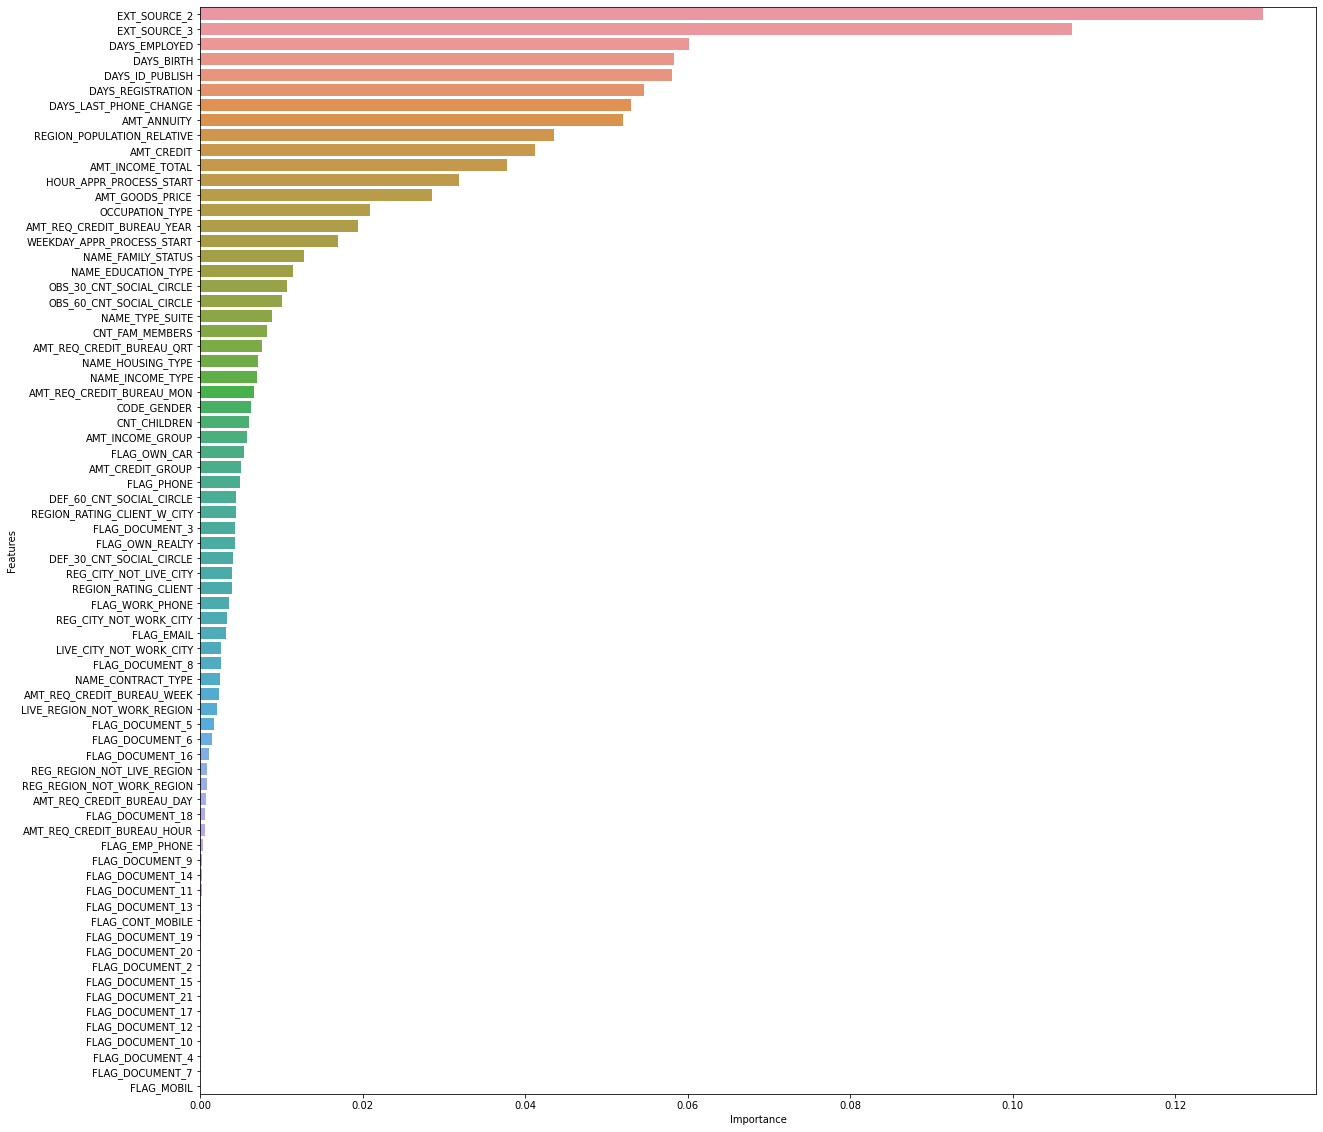

In [136]:
fig = plt.figure(figsize=(20,20))
features_imp = features_imp.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y = 'Features', data=features_imp)
plt.show()

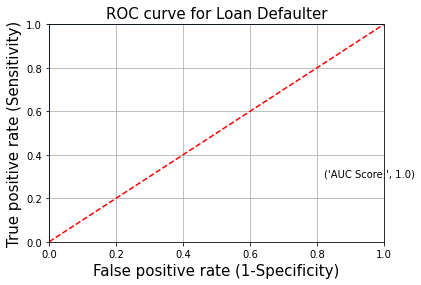

In [137]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test,test_pred),4)))
    plt.grid(True)

plot_roc(dt)

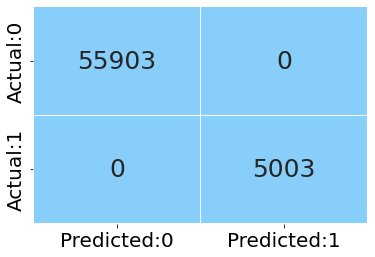

In [138]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()


plot_confusion_matrix(dt)

#Ensembling Technique

### Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 10)
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(random_state=10)

In [140]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [141]:
print(classification_report(y_train, train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    223956
         1.0       1.00      1.00      1.00     19664

    accuracy                           1.00    243620
   macro avg       1.00      1.00      1.00    243620
weighted avg       1.00      1.00      1.00    243620

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55903
         1.0       1.00      1.00      1.00      5003

    accuracy                           1.00     60906
   macro avg       1.00      1.00      1.00     60906
weighted avg       1.00      1.00      1.00     60906



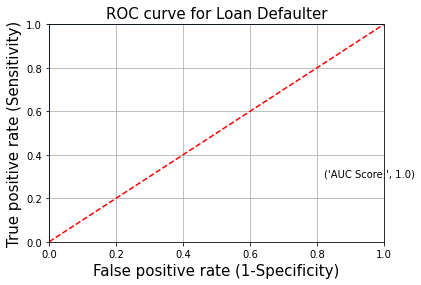

In [142]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test,test_pred),4)))
    plt.grid(True)

plot_roc(rf)

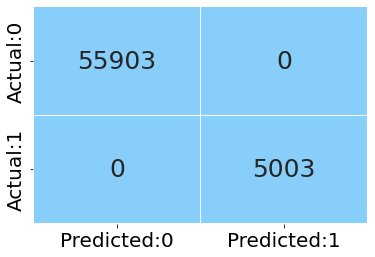

In [143]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()


plot_confusion_matrix(rf)

###ADA Boost

In [144]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_res,y_train_res)
ypred_ada = ada.predict(X_test)

In [145]:
train_pred = ada.predict(X_train)
test_pred = ada.predict(X_test)

In [146]:
print(classification_report(y_train, train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80    223956
         1.0       0.16      0.67      0.26     19664

    accuracy                           0.69    243620
   macro avg       0.56      0.68      0.53    243620
weighted avg       0.90      0.69      0.76    243620

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     55903
         1.0       0.16      0.67      0.26      5003

    accuracy                           0.68     60906
   macro avg       0.56      0.68      0.53     60906
weighted avg       0.89      0.68      0.76     60906



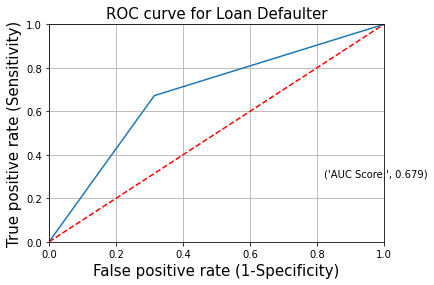

In [147]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test,test_pred),4)))
    plt.grid(True)

plot_roc(ada)

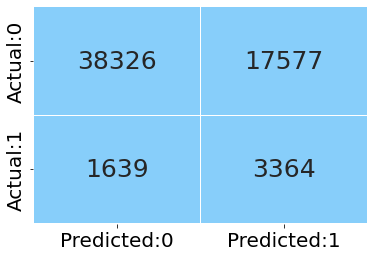

In [148]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()


plot_confusion_matrix(ada)

###XG Boost

In [149]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_res,y_train_res)  

XGBClassifier()

In [150]:
train_pred = xgbc.predict(X_train)
test_pred = xgbc.predict(X_test)

In [151]:
print(classification_report(y_train, train_pred))
print(classification_report(y_test,test_pred))
print(cohen_kappa_score(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80    223956
         1.0       0.16      0.69      0.26     19664

    accuracy                           0.69    243620
   macro avg       0.56      0.69      0.53    243620
weighted avg       0.90      0.69      0.76    243620

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     55903
         1.0       0.16      0.68      0.26      5003

    accuracy                           0.69     60906
   macro avg       0.56      0.68      0.53     60906
weighted avg       0.89      0.69      0.76     60906

0.15051955805101258


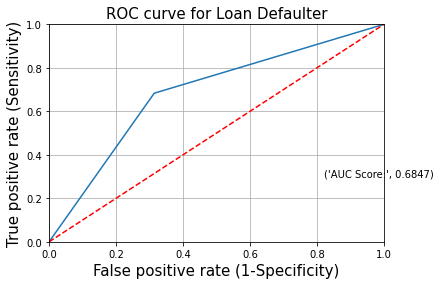

In [152]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test,test_pred),4)))
    plt.grid(True)
plot_roc(xgbc)

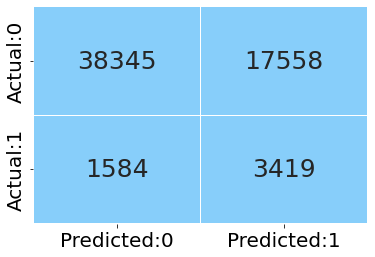

In [153]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()


plot_confusion_matrix(xgbc)

### Gradient boosting

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 2, random_state=10)
gb.fit(X_train_res,y_train_res)

GradientBoostingClassifier(n_estimators=2, random_state=10)

In [155]:
train_pred = gb.predict(X_train)
test_pred = gb.predict(X_test)

In [156]:
print(classification_report(y_train, train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.67      0.79    223956
         1.0       0.14      0.64      0.24     19664

    accuracy                           0.67    243620
   macro avg       0.55      0.65      0.51    243620
weighted avg       0.89      0.67      0.74    243620

              precision    recall  f1-score   support

         0.0       0.95      0.67      0.78     55903
         1.0       0.14      0.63      0.24      5003

    accuracy                           0.66     60906
   macro avg       0.55      0.65      0.51     60906
weighted avg       0.89      0.66      0.74     60906



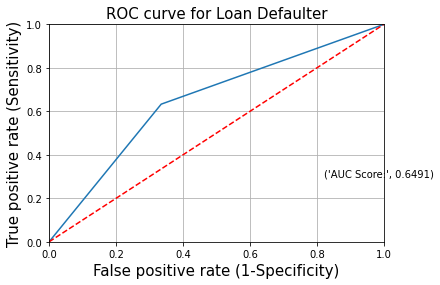

In [157]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test,test_pred),4)))
    plt.grid(True)

plot_roc(gb)

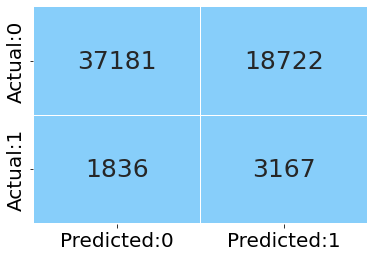

In [158]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()


plot_confusion_matrix(gb)

# Regularization

### XG Boost

In [159]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


In [160]:
tuning_parameters = {'learning_rate': [0.1, 0.2],
                     'max_depth': range(3,5),
                     'gamma': [1, 2,]}


xgb_model = XGBClassifier()


xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')


xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 2, 'learning_rate': 0.2, 'max_depth': 4} 



In [161]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(gamma= 2, learning_rate= 0.2, max_depth= 4)
xgbc.fit(X_train_res,y_train_res)  

XGBClassifier(gamma=2, learning_rate=0.2, max_depth=4)

In [162]:
train_pred = xgbc.predict(X_train)
test_pred = xgbc.predict(X_test)

In [163]:
print(classification_report(y_train, train_pred))
print(classification_report(y_test,test_pred))
print(cohen_kappa_score(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81    223956
         1.0       0.17      0.70      0.28     19664

    accuracy                           0.70    243620
   macro avg       0.57      0.70      0.55    243620
weighted avg       0.90      0.70      0.77    243620

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     55903
         1.0       0.17      0.70      0.28      5003

    accuracy                           0.70     60906
   macro avg       0.57      0.70      0.54     60906
weighted avg       0.90      0.70      0.77     60906

0.16633456281880132


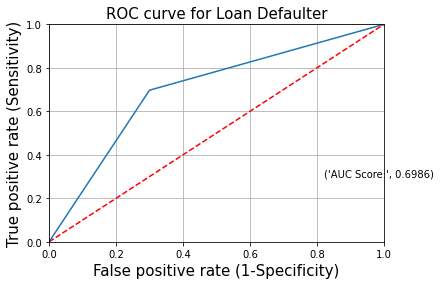

In [164]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Loan Defaulter', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test,test_pred),4)))
    plt.grid(True)

plot_roc(xgbc)

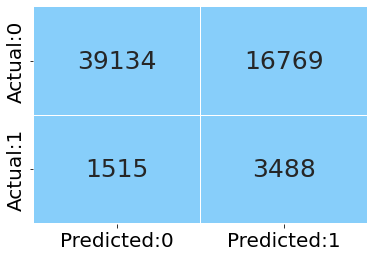

In [165]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)


    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()
plot_confusion_matrix(xgbc)